<span style="font-size:32px; font-weight:bold;">Проект: "Обучение с учителем: качество модели"

### Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.  

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования.

Итак, необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Задачу нужно выполнить в два этапа:**
- Разработать модель, которая предскажет вероятность снижения покупательской активности.
- Выделить сегмент покупателей, проанализируйть его и предложить, как увеличить его покупательскую активность. Использовать данные моделирования, данные о прибыли покупателей и исходные данные (если понадобятся).


**Установленный подход к решению задачи:**  

- Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
- Нужно собрать данные по клиентам по следующим группам:
  - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
  - Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
  - Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
  - Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
- Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
- В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
- Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.  

Руководство одобрило описание решения, нужно его реализовать.

### Описание данных

Данные для работы находятся в нескольких таблицах.
- market_file.csv
  Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
  + id — номер покупателя в корпоративной базе данных.
  + Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
  + Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
  + Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
  + Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
  + Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
  + Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
  + Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
  + Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
  + Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
  + Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
  + Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
  + Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.
- market_money.csv
  Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
  + id — номер покупателя в корпоративной базе данных.
  + Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
  + Выручка — сумма выручки за период.
- market_time.csv
  Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
  + id — номер покупателя в корпоративной базе данных.
  + Период — название периода, во время которого зафиксировано общее время.
  + минут — значение времени, проведённого на сайте, в минутах.
- money.csv
  Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
  + id — номер покупателя в корпоративной базе данных.
  + Прибыль — значение прибыли.

### Установка и импорт библиотек, функции.

In [1]:
!pip install phik -q
!pip install scikit-learn==0.24.1 -q
!pip install optuna -q
!pip install optuna-integration[sklearn] -q
!pip install shap -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.12.4 requires scikit-learn>=1.0.2, but you have scikit-learn 0.24.1 which is incompatible.


In [2]:
# Стандартные библиотеки Python
import os
import warnings
import time
import pickle
import random

# Внешние библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Библиотеки для статистической оценки
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import phik

# Библиотеки для оптимизации
import optuna
from optuna import distributions
from optuna.integration import OptunaSearchCV
from optuna.distributions import IntUniformDistribution, FloatDistribution

# SHAP
import shap

# Параллельная обработка
from joblib import Parallel, delayed

# Импорты из sklearn
## Метрики
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    precision_score,
    recall_score,
    r2_score,
    precision_recall_curve,
    make_scorer,
    fbeta_score,
)

## Модели
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Препроцессинг данных
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    LabelEncoder,
    PolynomialFeatures,
)

## Выбор признаков
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

## Пайплайны и трансформеры
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

## Разделение данных и поиск гиперпараметров
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    StratifiedKFold,
)

## Исключения
from sklearn.exceptions import ConvergenceWarning


In [3]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [4]:
# os.environ["OMP_NUM_THREADS"] = "1"
os.environ['PYTHONHASHSEED'] = str(RANDOM_STATE)

# Установка общего random seed для numpy, random и библиотек
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)

warnings.filterwarnings("ignore")

In [5]:
def load_and_check_csv(filepath, url, sep=',', decimal='.'):
    try:
        df = pd.read_csv(filepath, sep=sep, decimal=decimal)
        source = filepath
    except:
        df = pd.read_csv(url, sep=sep, decimal=decimal)
        source = url
    
    # Проверим, загружены ли данные корректно
    print(f"Загружены данные из {source}")
    print(df.head())
    
    # Проверка типов данных
    df.info()
    
    print('='*70, '\n\n')
    
    return df

In [6]:
def lower_snake(df):
    # Преобразуем названия столбцов
    df.columns = df.columns.str.replace(' ', '_').str.lower()

    # Преобразуем строковые значения в каждом столбце
    for col in df.select_dtypes(include='object'):
        df[col] = df[col].str.replace(' ', '_').str.lower()

    display(df.head())

In [7]:
def plot_distr_and_boxplot(df: pd.DataFrame, column: str) -> None:
    
    # Рассчитываем среднее и стандартное отклонение для нормального распределения
    mean = df[column].mean()
    std = df[column].std()

    # Создаем сетку значений по оси X
    x = np.linspace(df[column].min(), df[column].max(), 100)
    y = norm.pdf(x, mean, std) * len(df[column]) * (df[column].max() - df[column].min()) / 40  # Подгоняем масштаб

    plt.figure(figsize=(12, 6))

    # Гистограмма с плотностью KDE (Kernel Density Estimate - показывает гладкую оценку плотности вероятности данных)
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=40, kde=True, color='skyblue')
    plt.axvline(df[column].mean(), color='red', linestyle='--', label='среднее')
    plt.axvline(df[column].median(), color='orange', linestyle='-', label='медиана')

    # Линия нормального распределения
    plt.plot(x, y, color='green', label='Нормальное распределение')

    plt.title(f'Гистограмма распределения {column}')
    plt.xlabel(column)
    plt.ylabel('Количество')
    plt.legend()

    # Ящик с усами
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column], color='lightgreen')
    plt.title(f'Ящик с усами для {column}')

    plt.tight_layout()
    plt.show()

In [8]:
def calc_boxplot_stats(data: pd.Series):
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    statistics = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers': outliers
    }
    
    return statistics

In [9]:
def calculate_vif(df, num_columns):
    X = df[num_columns]

    # Добавляем константный столбец для расчета VIF (обязательно для корректного расчета)
    X_with_const = sm.add_constant(X)

    # Рассчитаем VIF для каждого признака
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i+1)  # смещение +1 из-за константы
                       for i in range(len(X.columns))]

    return vif_data

In [10]:
def plot_pie_charts(df, columns, colors=None, title_fontsize=24, label_fontsize=18, figsize_base=8):
    n_cols = len(columns)
    fig, axes = plt.subplots(1, n_cols, figsize=(figsize_base * n_cols, figsize_base))

    # Преобразуем axes в массив, если он не является массивом
    if n_cols == 1:
        axes = [axes]

    for ax, column in zip(axes, columns):
        df[column].value_counts().plot(
            kind='pie',
            autopct='%1.1f%%',
            labels=df[column].value_counts().index,
            colors=colors if colors else plt.cm.tab10.colors,
            ax=ax
        )
        ax.set_title(column, fontsize=title_fontsize)
        ax.set_ylabel('')
        for text in ax.texts:
            text.set_fontsize(label_fontsize)

    plt.tight_layout()
    plt.show()


In [11]:
def get_false_negative_rate(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    fn, tp = conf_matrix[1, 0], conf_matrix[1, 1]
    if fn + tp == 0:
        return -100
    return -fn / (fn + tp)

In [12]:
def get_false_positive_rate(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    fpr = conf_matrix[0,1]/(conf_matrix[0,1] + conf_matrix[0,0])
    return -fpr

In [13]:
def plot_shap_values(
    shap_values, 
    feature_names,
    title="Важность признаков (SHAP)", 
    xlabel="Среднее абсолютное значение SHAP", 
    ylabel="Признаки"
):
    """
    Строит горизонтальный график важности признаков на основе SHAP values.

    Parameters:
    - shap_values (numpy.ndarray): Матрица значений SHAP (n_samples, n_features).
    - feature_names (list): Список имён признаков.
    - title (str): Заголовок графика.
    - xlabel (str): Подпись оси X.
    - ylabel (str): Подпись оси Y.
    """
    # Рассчитаем средние абсолютные значения SHAP для каждого признака
    mean_abs_shap_values = np.abs(shap_values).mean(axis=0)

    # Создаём DataFrame для сортировки
    shap_df = pd.DataFrame({
        'feature': feature_names,
        'mean_abs_shap': mean_abs_shap_values
    })

    shap_df = shap_df.sort_values('mean_abs_shap', ascending=False)

    # Построение графика
    plt.figure(figsize=(10, 10))
    bars = plt.barh(shap_df['feature'], shap_df['mean_abs_shap'], color="skyblue")
    
    # Добавляем значения на график
    for bar, value in zip(bars, shap_df['mean_abs_shap']):
        plt.text(value, bar.get_y() + bar.get_height() / 2, f"{value:.2f}", va="center", fontsize=10)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()


In [14]:
def plot_scatter_with_regression_all(df, target, num_columns, figsize=(20, 5), lines_at=[]):
    # Проверка, является ли num_columns списком, и преобразуем в список, если это не так
    if isinstance(num_columns, str):
        num_columns = [num_columns]

    # Расчет количества рядов (строк) в подграфиках
    ncols = 3  # максимальное количество графиков в одном ряду
    nrows = (len(num_columns) + ncols - 1) // ncols  # округление вверх для получения необходимого количества рядов

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()  # Преобразуем массив осей в одномерный, чтобы работать с ним проще

    # Для каждого количественного признака построим scatter plot с линейной регрессией
    for i, num_col in enumerate(num_columns):
        ax = axes[i]

        # Используем hue для градиентной окраски
        sns.scatterplot(
            data=df,
            x=num_col,
            y=target,
            hue=target,
            palette="coolwarm",
            ax=ax,
            legend=False
        )

        X = df[[num_col]].values
        y = df[target].values
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)

        # Наложение прямой регрессии
        ax.plot(df[num_col], y_pred, color='red', linewidth=2, label=f'R²: {r2_score(y, y_pred):.2f}')
        ax.legend()

        ax.set_title(f'Лин. рег.: {num_col} и {target}')
        ax.set_xlabel(num_col)
        ax.set_ylabel(target)

        # Добавление горизонтальных линий на указанные значения (например, 0.5 и 0.85)
        for line in lines_at:
            ax.axhline(line, color='blue', linestyle='--', label=f"Вероятность: {line}")

    # Скрыть пустые оси, если их осталось меньше, чем требуется
    for i in range(len(num_columns), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

In [15]:
def cross_val_scoring(parapm_searcher, X_train, y_train, results_df, model_name):
    model_to_test = parapm_searcher[-1]
    X_train_transformed = parapm_searcher[:-1].transform(X_train)
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
    
    scoring = { 
    'fbeta_score' : fbeta_scorer,    
    'roc_auc_score' : 'roc_auc',
    'recall_score' : 'recall',
    'precision_score' : 'precision'
    }

    scores = cross_validate(
        model_to_test,
        X_train_transformed,
        y_train,
        scoring=scoring,
        cv=cv,
        n_jobs=-1
    )
    
    results_df.loc[len(results_df)] = [
        model_name,
        scores['test_fbeta_score'].mean(),
        scores['test_recall_score'].mean(),
        scores['test_precision_score'].mean(),
        scores['test_roc_auc_score'].mean()
    ]


## Шаг 1. Загрузка данных

### Загрузим данные.  

Файлы
- market_file.csv
- market_money.csv
- market_time.csv
- money.csv  

In [16]:
df_market_file = load_and_check_csv('/datasets/market_file.csv', 
                                   'https://code.s3.yandex.net/datasets/market_file.csv')

df_market_money = load_and_check_csv('/datasets/market_money.csv', 
                                   'https://code.s3.yandex.net/datasets/market_money.csv')

df_market_time = load_and_check_csv('/datasets/market_time.csv', 
                                   'https://code.s3.yandex.net/datasets/market_time.csv')

df_money = load_and_check_csv('/datasets/money.csv', 
                                   'https://code.s3.yandex.net/datasets/money.csv',
                                   sep=';', decimal=',')

Загружены данные из https://code.s3.yandex.net/datasets/market_file.csv
       id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Ср

### Выводы по шагу 1.

- Загрузили данные и создали 4 датафрейма
  - df_market_file
  - df_market_money
  - df_market_time
  - df_money  
  
  Пропуски в данных отсутствуют.  
  Данные в таблицах соответствуют описанию.  

## Шаг 2. Предобработка данных  

Проведём необходимую предобработку данных. Названия столбцов оставим кириллическими.

In [17]:
df_market_money[df_market_money['id']==216053]

,id,Период,Выручка
2115,216053,предыдущий_месяц,5145.0
2116,216053,текущий_месяц,5275.0
2117,216053,препредыдущий_месяц,5145.0


Согласно выводам из прешествующего шага, необходимость корректировки типов данных отсутствует.

### Откорректируем названия столбцов и строковых значений.

Преобразуем названия столбцов и строковые значения в каждом столбце на змеиный стиль.

In [18]:
lower_snake(df_market_file)
lower_snake(df_market_money)
lower_snake(df_market_time)
lower_snake(df_money)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары_для_детей,6,2,1,5
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5
2,215350,снизилась,стандартт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5
3,215351,снизилась,стандартт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4
4,215352,снизилась,стандартт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2


,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


### Проверка дубликатов

In [19]:
(
    df_market_file.duplicated().sum(),
    df_market_money.duplicated().sum(),
    df_market_time.duplicated().sum(),
    df_money.duplicated().sum()
)

(0, 0, 0, 0)

Явные дубликаты отсутствуют.

### Проверка категориальных значений

In [20]:
(
    df_market_file.select_dtypes(include='object').apply(pd.Series.unique),
    df_market_money.select_dtypes(include='object').apply(pd.Series.unique),
    df_market_time.select_dtypes(include='object').apply(pd.Series.unique)
)

(покупательская_активность                         [снизилась, прежний_уровень]
 тип_сервиса                                     [премиум, стандартт, стандарт]
 разрешить_сообщать                                                   [да, нет]
 популярная_категория         [товары_для_детей, домашний_текстиль, косметик...
 dtype: object,
                 период
 0  препредыдущий_месяц
 1        текущий_месяц
 2     предыдущий_месяц,
              период
 0     текущий_месяц
 1  предыдцщий_месяц)

In [21]:
df_market_file['популярная_категория'].unique()

array(['товары_для_детей', 'домашний_текстиль', 'косметика_и_аксесуары',
       'техника_для_красоты_и_здоровья', 'кухонная_посуда',
       'мелкая_бытовая_техника_и_электроника'], dtype=object)

Исправим некоторые значения. Неявные дубликаты не выявлены.

In [22]:
df_market_file['тип_сервиса'] = df_market_file['тип_сервиса'].replace('стандартт', 'стандарт')
df_market_money['период'] = df_market_money['период'].replace('препредыдущий_месяц', 'предпредыдущий_месяц')
df_market_time['период'] = df_market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

In [23]:
(
    df_market_money.select_dtypes(include='object').apply(pd.Series.unique),
    df_market_time.select_dtypes(include='object').apply(pd.Series.unique)
)

(                 период
 0  предпредыдущий_месяц
 1         текущий_месяц
 2      предыдущий_месяц,
              период
 0     текущий_месяц
 1  предыдущий_месяц)

### Выводы по шагу 2.

- Дубликаты отсутствуют
- Необходимость корректировки типов данных отсутствует  


* Откорректировали названия столбцов и строковых значений
* Исправили некоторые значения


## Шаг 3. Исследовательский анализ данных  


- Проведём исследовательский анализ данных из каждой таблицы.
- Отберём клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

**Исследовательский анализ**
- Проведем статистический анализ всех признаков.
- Построим графики для каждого признака.
- Сделаем выводы о данных: наличие выбросов, необычное распределение количественных признаков или другие особенности.

### Количественные признаки

Построим гистограмму и ящик с усами boxplot для каждого количественного признака.

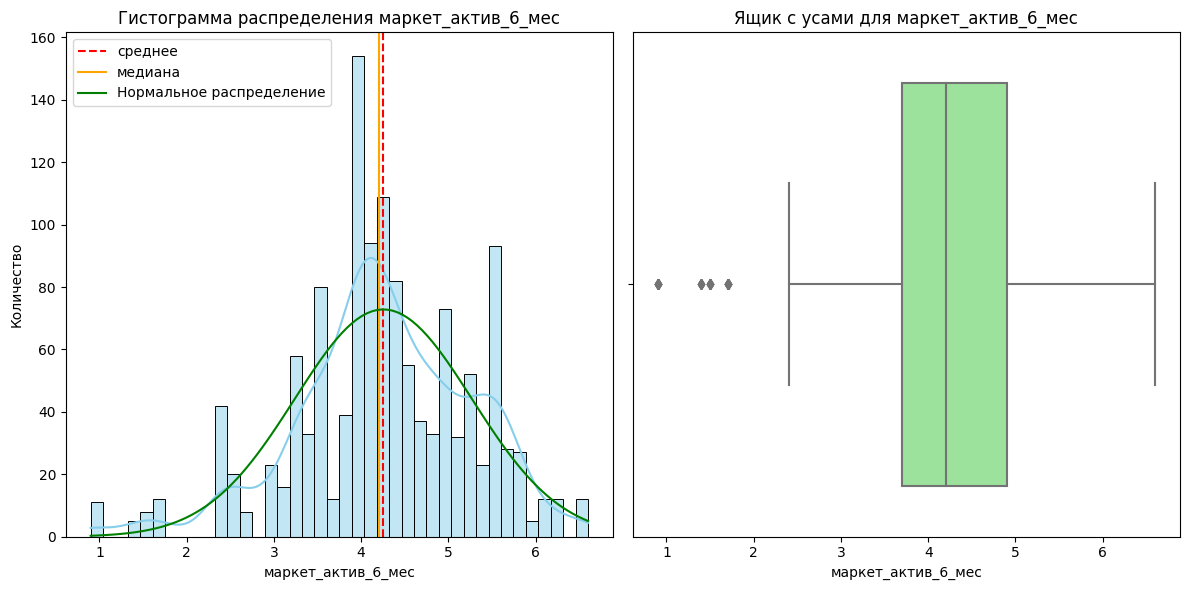

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64

In [24]:
plot_distr_and_boxplot(df_market_file, 'маркет_актив_6_мес')
df_market_file['маркет_актив_6_мес'].describe()

In [25]:
df_market_file[df_market_file['маркет_актив_6_мес'] < 2]['id'].count()

36

- `маркет_актив_6_мес` - среднемесячное значение маркетинговых коммуникаций за последние 6 месяцев.   
  Распределение от 0.9 до 6.6. Среднее 4.25.  
  Распределение отклоняется от нормального.  
  Отмечается некоторое количество (36 шт.) выбросов - клиенты, с которыми связывались в среднем менее 2 раз в месяц.

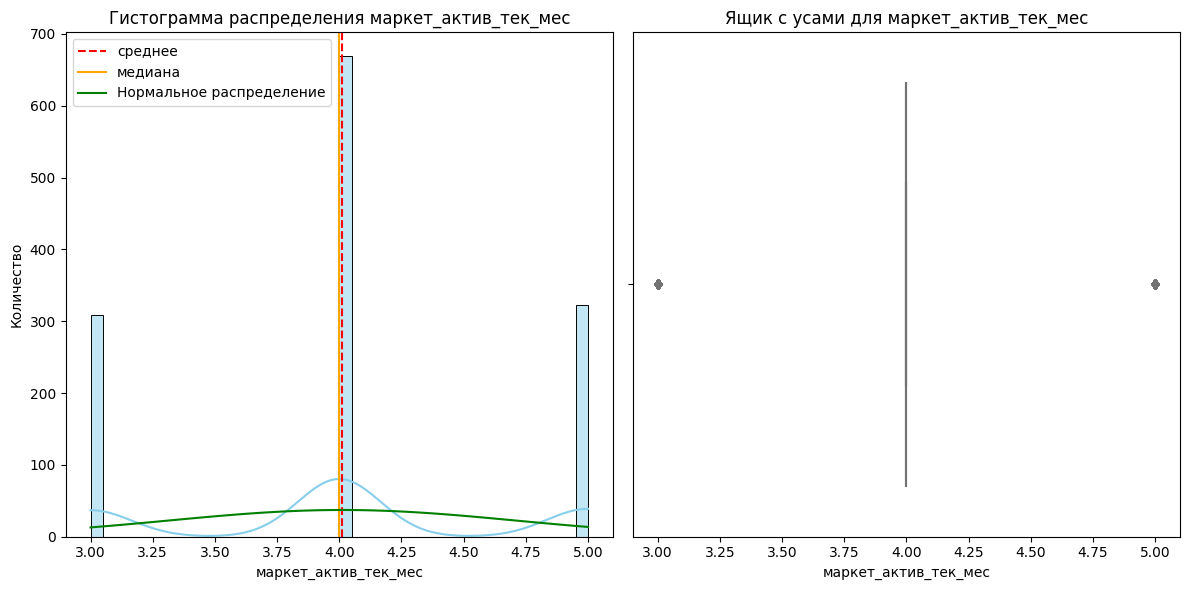

count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64

In [26]:
plot_distr_and_boxplot(df_market_file, 'маркет_актив_тек_мес')
df_market_file['маркет_актив_тек_мес'].describe()

In [27]:
df_market_file['маркет_актив_тек_мес'].value_counts()

4    669
5    323
3    308
Name: маркет_актив_тек_мес, dtype: int64

- `Маркет_актив_тек_мес` - количество маркетинговых коммуникаций в текущем месяце.  
  Принимает дискретные целочисленные значения:  3, 4 и 5. Причем, примерно половина значений "4" - преобладающий класс. Что примерно соответствует среднему показателю маркетинговых коммуникаций за последние 6 месяцев. Вместе с тем, клинеты с 1 - 2 контактами за текущий месяц отсутствуют.

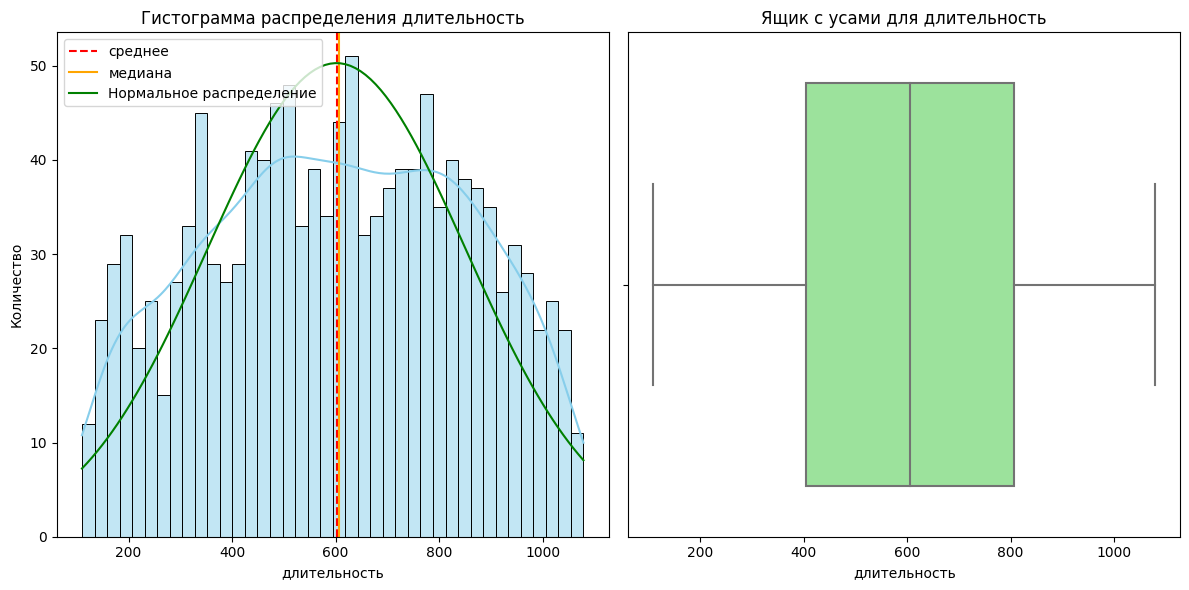

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64

In [28]:
plot_distr_and_boxplot(df_market_file, 'длительность')
df_market_file['длительность'].describe()

- `длительность` - дней прошло с момента регистрации покупателя на сайте.  
  Рачпределение от 110 до 1079. Среднее 602.
  Распределение отклоняется от нормального.
  При этом, для данного параметра эта тенденция говорит о том, что новых пользователей становится всё меньше.

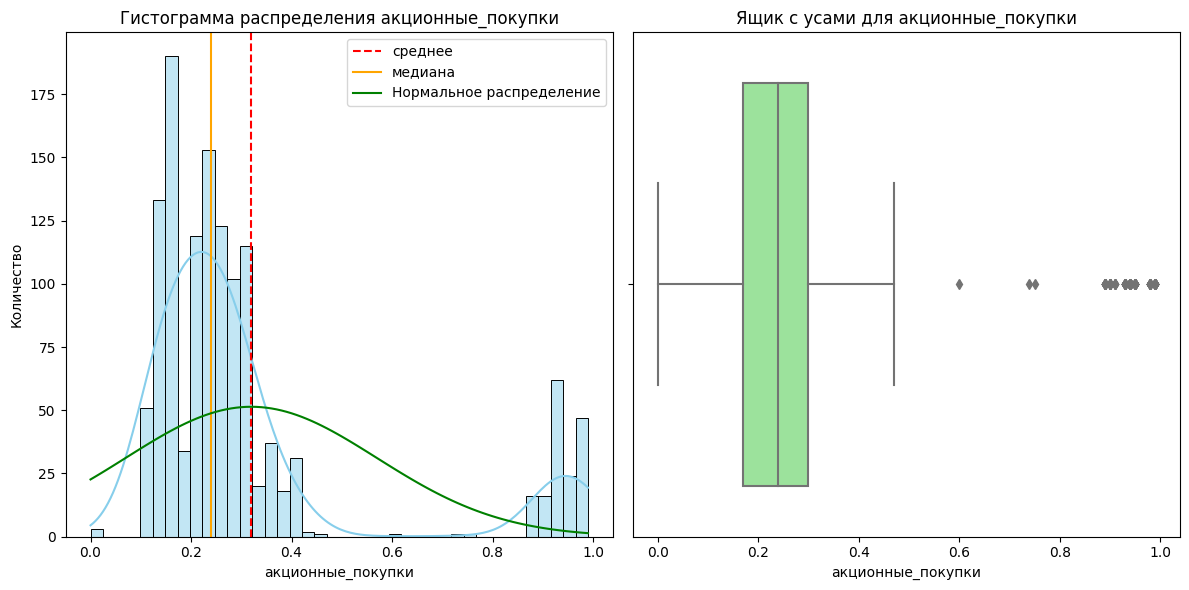

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64

In [29]:
plot_distr_and_boxplot(df_market_file, 'акционные_покупки')
df_market_file['акционные_покупки'].describe()

In [30]:
df_market_file[df_market_file['акционные_покупки'] >= 0.8]['акционные_покупки'].count()

165

- `акционные_покупки` - среднемесячная доля покупок по акции от общего числа покупок.  
  Отмечается две моды - в районе 0.24 и около 0.9.  
  Таким образом, можно выделить группу пользователей 165шт. (`акционные_покупки` > 0.8), которые почти все (или все) покупки совершают только по акциям.  
  При этом медианное значение (0.24) примерно отражает средний показатель пользователей, которые не стремятся совершать покупки только по акции.  

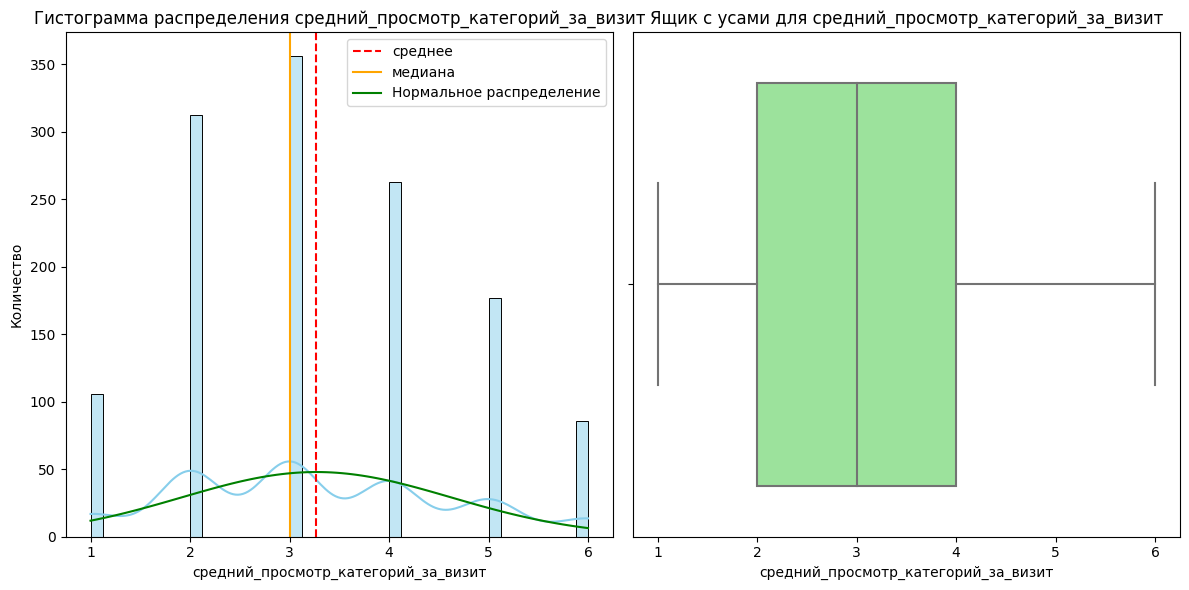

count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: средний_просмотр_категорий_за_визит, dtype: float64

In [31]:
plot_distr_and_boxplot(df_market_file, 'средний_просмотр_категорий_за_визит')
df_market_file['средний_просмотр_категорий_за_визит'].describe()

- `средний_просмотр_категорий_за_визит` - сколько в среднем категорий покупатель просмотрел за визит  
  Принимает дискретные целочисленные значения от 1 до 6 включительно.  
  При этом апроксимация распределения стремится к нормальному со средним 3. 

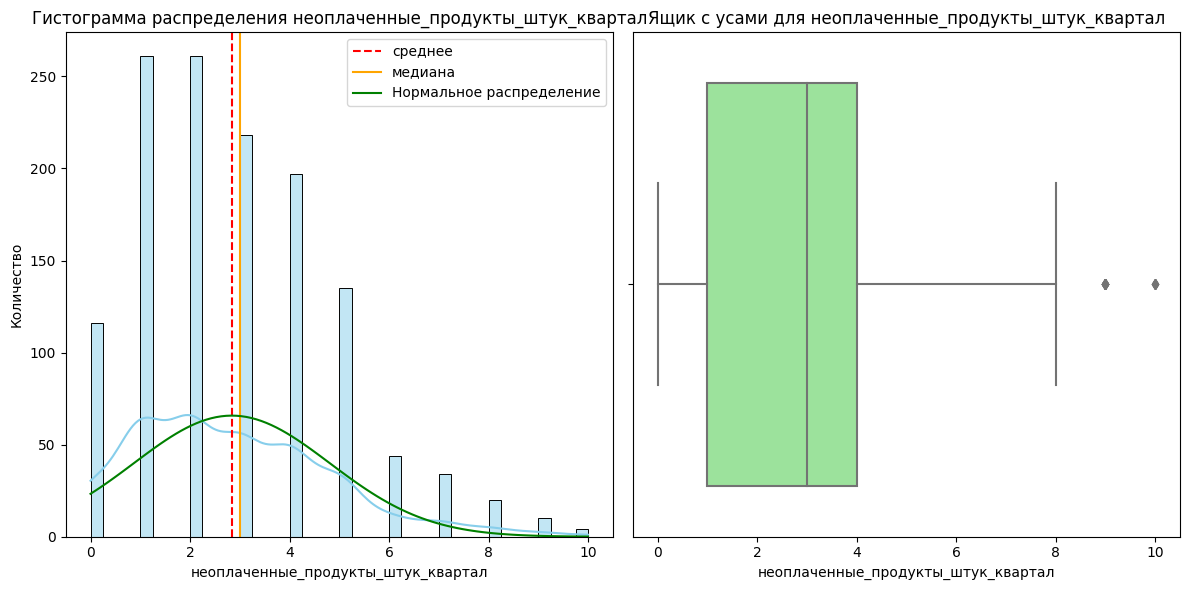

count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64

In [32]:
plot_distr_and_boxplot(df_market_file, 'неоплаченные_продукты_штук_квартал')
df_market_file['неоплаченные_продукты_штук_квартал'].describe()

In [33]:
df_market_file[df_market_file['неоплаченные_продукты_штук_квартал'] >= 8]['id'].count()

34

- `неоплаченные_продукты_штук_квартал` - общее число неоплаченных товаров в корзине за последние 3 месяца.  
  Принимает дискретные целочисленные значения от 0 до 10 включительно.  
  При этом апроксимация распределения стремится к нормальному со средним 3, скошено слева.  
  Отмечается некоторое количество (34 шт.) выбросов (значения более 8). 

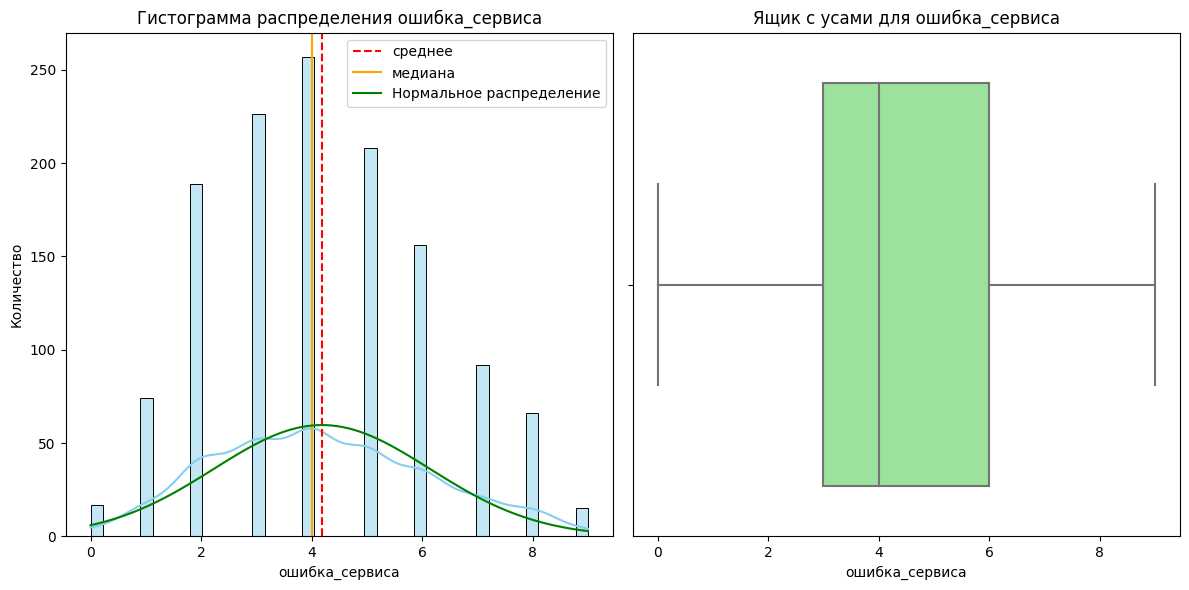

count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64

In [34]:
plot_distr_and_boxplot(df_market_file, 'ошибка_сервиса')
df_market_file['ошибка_сервиса'].describe()

- `ошибка_сервиса` - число сбоев, которые коснулись покупателя во время посещения сайта.  
  Принимает дискретные целочисленные значения от 0 до 9 включительно.  
  При этом апроксимация распределения стремится к нормальному со средним 4.
 

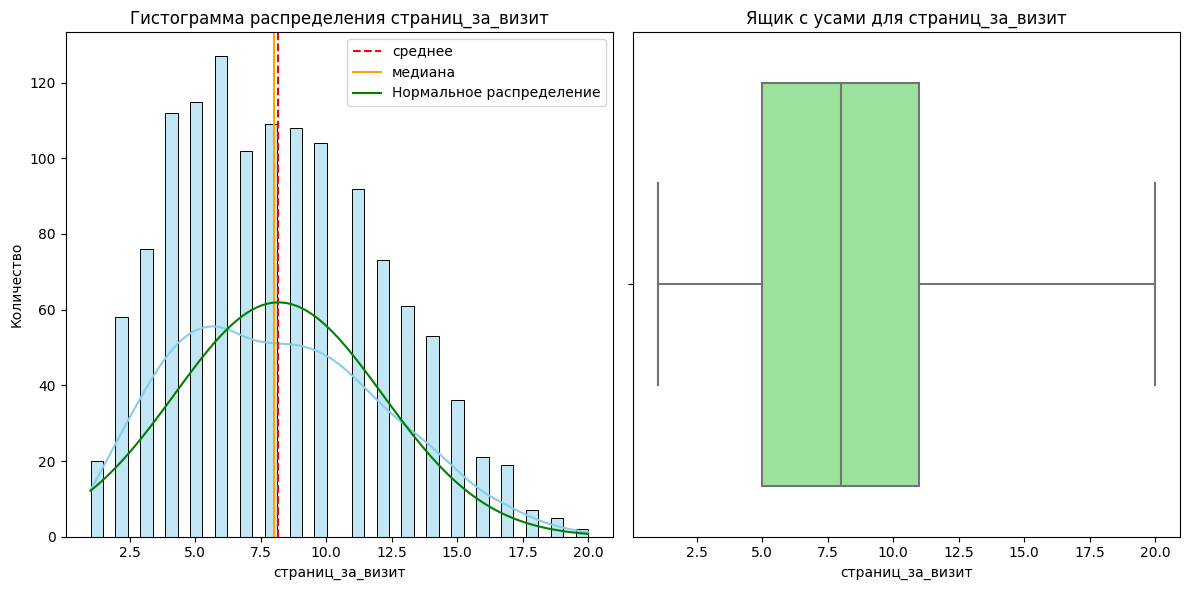

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64

In [35]:
plot_distr_and_boxplot(df_market_file, 'страниц_за_визит')
df_market_file['страниц_за_визит'].describe()

- `страниц_за_визит` - среднее количество страниц, которые просмотрел покупатель за один визит на сайт.  
  Принимает дискретные целочисленные значения от 1 до 20 включительно.  
  При этом апроксимация распределения стремится к нормальному со средним 8.  

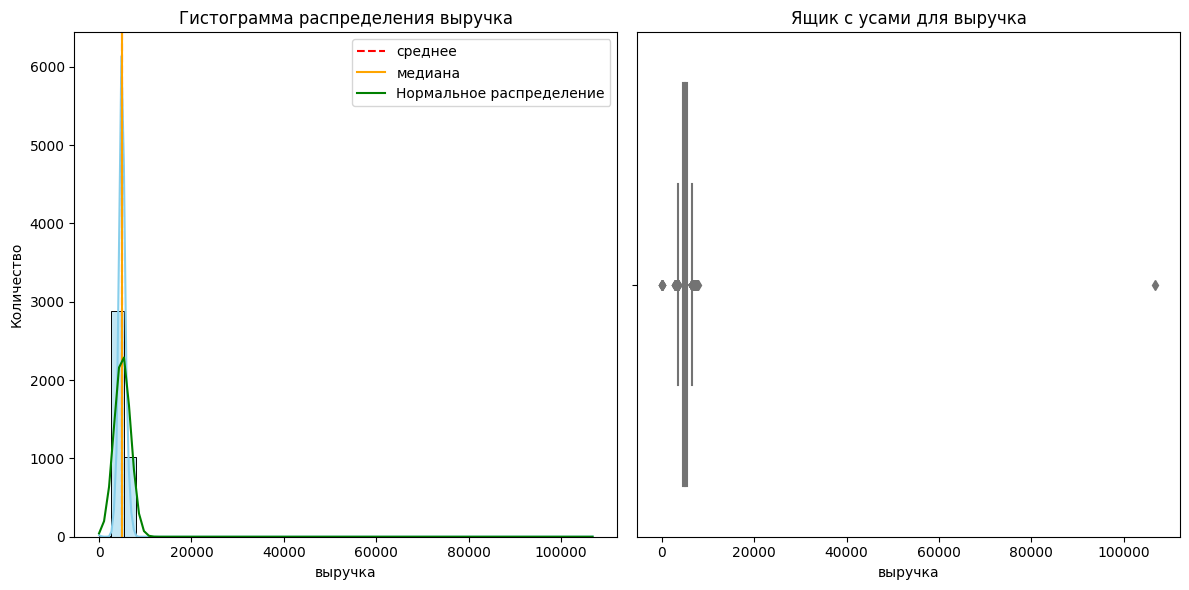

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64

In [36]:
plot_distr_and_boxplot(df_market_money, 'выручка')
df_market_money['выручка'].describe()

In [37]:
df_market_money[df_market_money['выручка'] > 10000]

,id,период,выручка
98,215380,текущий_месяц,106862.2


In [38]:
df_market_money[df_market_money['выручка'] < 2000]

,id,период,выручка
0,215348,предпредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,предпредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,предпредыдущий_месяц,0.0


Отмечается одно аномальное значение выброс (выручка 106862 руб.). Хотя это и может быть реальный клиент, а не аномальное значение, вместе с тем, всего одна эта позиция очень сильно отличается от остальных (на порядок). Удалим указанное значение. 
А также всего 6 строк с выручкой = 0. При этом по текущему месяцу по данным пользователям выручка есть.

In [39]:
df_market_money = df_market_money[df_market_money['выручка'] < 10000]

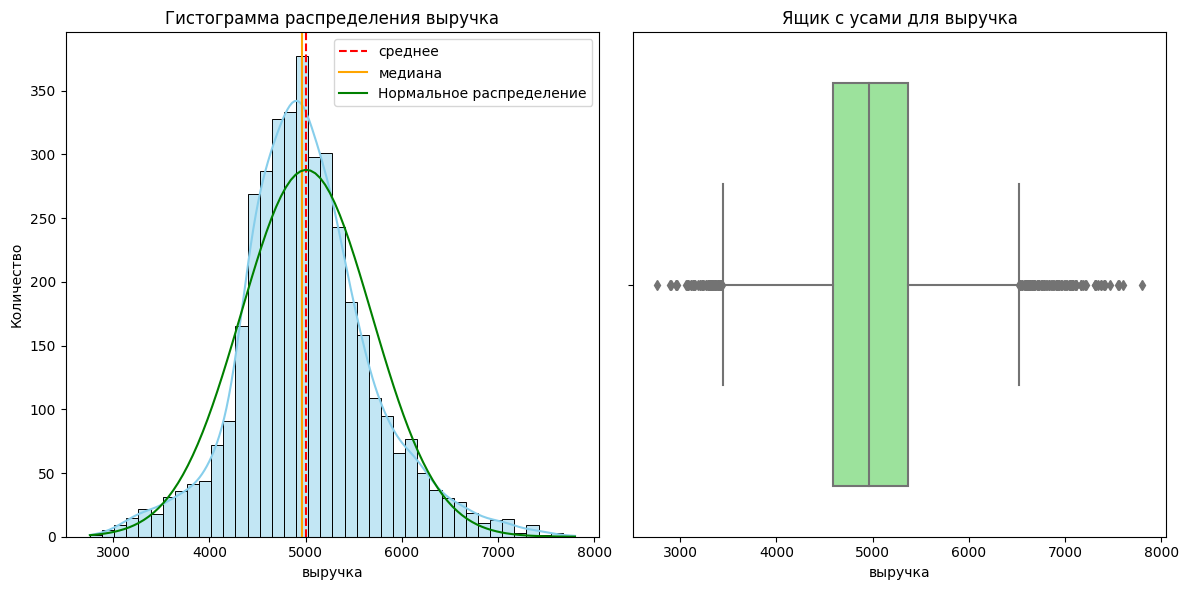

count    3893.000000
mean     5007.282918
std       679.724898
min      2758.700000
25%      4592.000000
50%      4959.000000
75%      5363.000000
max      7799.400000
Name: выручка, dtype: float64

In [40]:
plot_distr_and_boxplot(df_market_money[
    (df_market_money['выручка'] > 2000) 
    & (df_market_money['выручка'] < 10000)
], 'выручка')

df_market_money[
    (df_market_money['выручка'] > 2000) 
    & (df_market_money['выручка'] < 10000)
]['выручка'].describe()

- `выручка` - сумма выручки за период.  
   Распределение близко к нормальному.  
   От 2758.7 до 7799.4. Среднее 5007.3. Стандартное отклонение 679.7.  
   Отмечается одно аномальное значение выброс (выручка 106862 руб.), существенно отличается от остальных (на порядок). А также всего 6 строк с выручкой = 0. 
   Вместе с тем, даже без учета экстремальных значений (0 и 106 тыс.) на box-plot отчетливо видны выбросы - значения, которые выходят за  границы усов boxplot (более чем на полтора межквартильных размаха) как слева, так и справа.

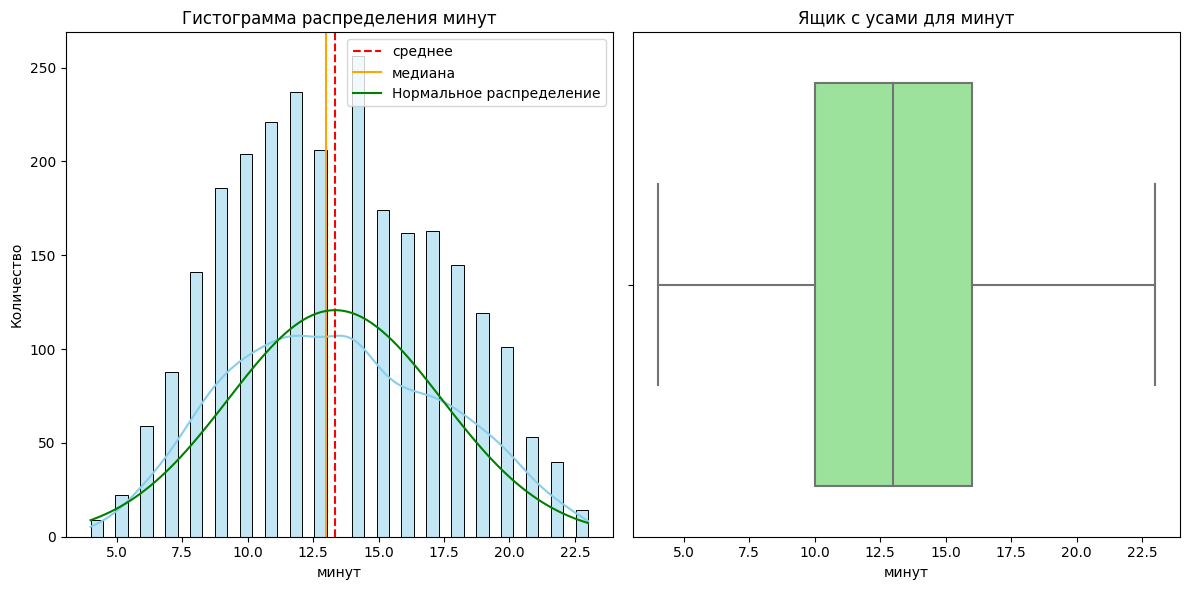

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64

In [41]:
plot_distr_and_boxplot(df_market_time, 'минут')
df_market_time['минут'].describe()

- `минут` - значение времени, проведённого на сайте, в минутах.  
   Принимает целочисленные значения.  
   От 4 до 23. Среднее 13. Стандартное отклонение 4.  
   Апроксимация распределения близко к нормальному.  

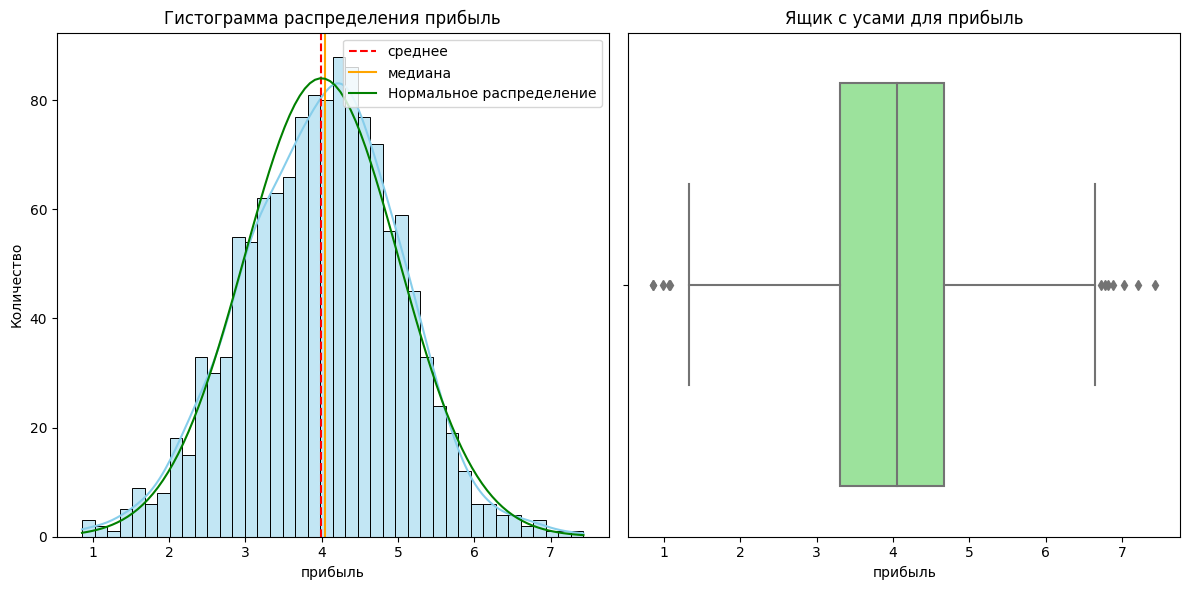

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

In [42]:
plot_distr_and_boxplot(df_money, 'прибыль')
df_money['прибыль'].describe()

- `прибыль` - значение прибыли.  
  Распределение максимально приближено к нормальному.  
  От 0.86 до 7.43. Среднее 4.  Стандартное отклонение 1.01.
  Вместе с тем, на box-plot отчетливо видно некоторое количество выбросов - значений, которые выходят за  границы усов boxplot (более чем на полтора межквартильных размаха) как слева, так и справа.  

### Категориальные признаки

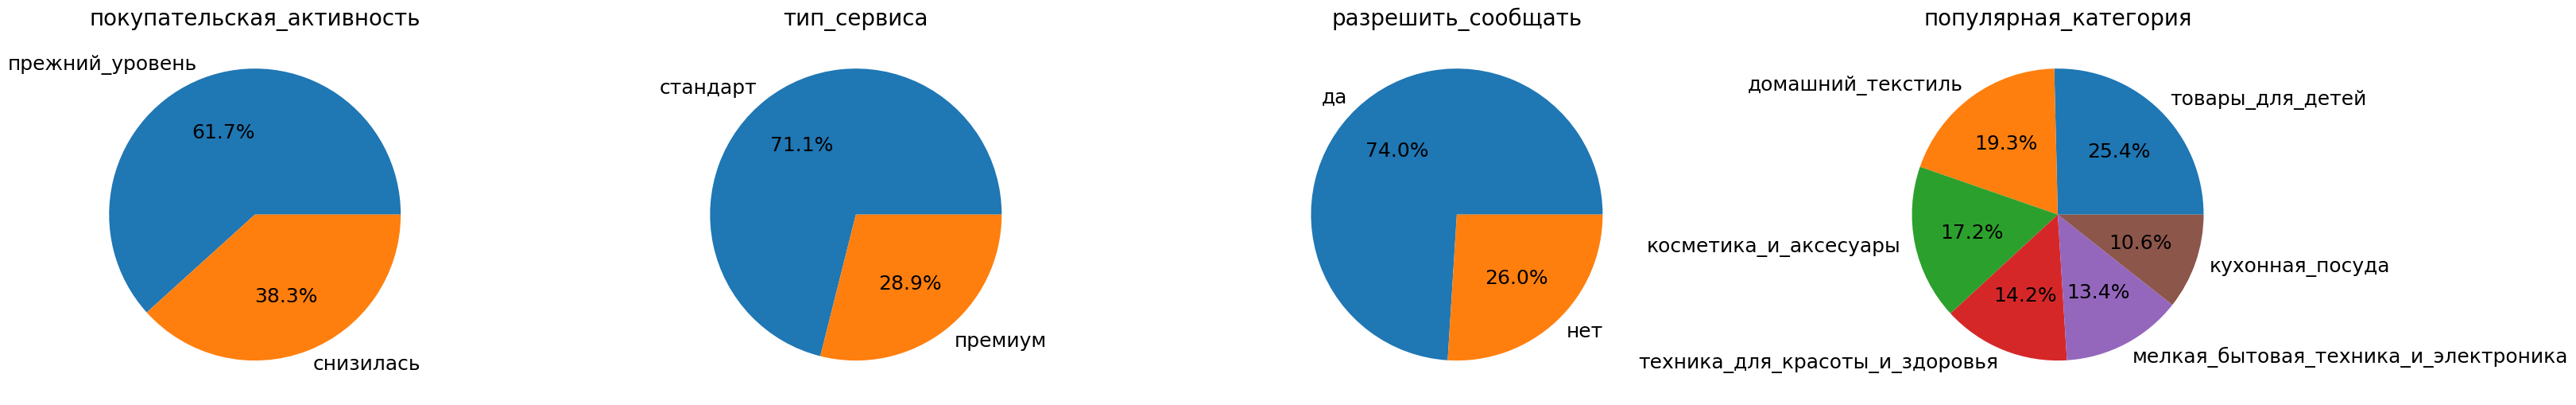

In [43]:
cat_cols_df_market_file = \
    df_market_file.drop('id', axis=1).select_dtypes(include=['object']).columns

plot_pie_charts(
    df_market_file, 
    cat_cols_df_market_file, 
    title_fontsize=20, 
    label_fontsize=18, 
    figsize_base=8
)

- `покупательская_активность` `df_market_file` **целевой признак** - рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень». Биноминальный признак.   
  Отмечается наличие определенного дисбаланса классов. Покупательская активность 38.3 % пользователей снизилась (искомый класс).  
  
  
- `тип_сервиса` `df_market_file`- уровень сервиса: «премиум» или «стандарт». Биноминальный признак.  
  28.9 % пользователей пользуются премиум сервисом.  


- `разрешить_сообщать` `df_market_file` - информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Биноминальный признак.  
  74 % пользователей дали согласие на рассылку.


- `популярная_категория` `df_market_file` - самая популярная категория товаров у покупателя за последние 6 месяцев.  
  Признак содержит 6 классов. Распределение долей от 10.6 % (кухонная посуда) до 25.4 % (товары для детей).  

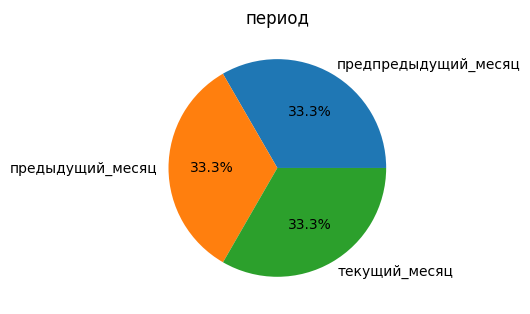

In [44]:
plot_pie_charts(
    df_market_money, 
    ['период'], 
    title_fontsize=12, 
    label_fontsize=10, 
    figsize_base=5
)

- `период` `df_market_money` - название периода, во время которого зафиксирована выручка.   
  Значения распределены равномерно между тремя периодами. То есть по всем пользователям имеется информация за каждый из трех периодов (текущий, предыдущий, предпредыдущий месяцы).  

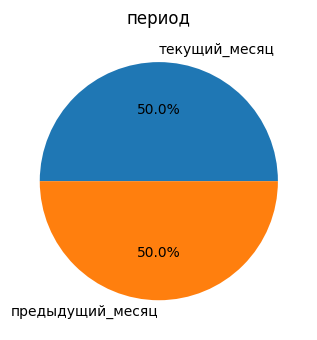

In [45]:
plot_pie_charts(
    df_market_time, 
    ['период'], 
    title_fontsize=12, 
    label_fontsize=10, 
    figsize_base=3.5
)

- `период` `df_market_time` - название периода, во время которого зафиксировано общее время.  
  Значения распределены равномерно между двумя периодами. То есть по всем пользователям имеется информация за каждый из двух периодов (текущий, предыдущий месяцы).

### Отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

In [46]:
mask_active_customer = ~df_market_money['id'].isin(
    df_market_money[df_market_money['выручка'] == 0]['id']
)

id_active_customer = df_market_money[mask_active_customer]['id'].unique()

df_market_money[df_market_money['выручка'] == 0]['id'].unique()

array([215348, 215357, 215359], dtype=int64)

In [47]:
df_market_money = df_market_money[mask_active_customer]
df_market_money['id'].nunique()

1297

Отмечается, что только у 3 пользователей есть нулевые значения выручки. Удалим из нашей выборки данные об этих пользователях.  
Таким образом, почти все (1297) пользователи из представленных данных - активные.

### Выводы по шагу 3.

**По результатам проведенного анализа установлено следующее:  

- **Количественные признаки:**
  - `маркет_актив_6_мес` - среднемесячное значение маркетинговых коммуникаций за последние 6 месяцев.   
    Распределение от 0.9 до 6.6. Среднее 4.25.  
    Распределение отклоняется от нормального.  
    Отмечается некоторое количество (36 шт.) выбросов - клиенты, с которыми связывались в среднем менее 2 раз в месяц.  
  - `Маркет_актив_тек_мес` - количество маркетинговых коммуникаций в текущем месяце.  
    Принимает дискретные целочисленные значения:  3, 4 и 5.  
    Причем, примерно половина значений "4" - преобладающий класс. Что примерно соответствует среднему показателю маркетинговых коммуникаций за последние 6 месяцев.  
    Вместе с тем, клинеты с 1 - 2 контактами за текущий месяц отсутствуют.
  - `длительность` - дней прошло с момента регистрации покупателя на сайте.  
    Рачпределение от 110 до 1079. Среднее 602.
    Распределение отклоняется от нормального.
    При этом, для данного параметра эта тенденция говорит о том, что новых пользователей становится всё меньше.  
  - `акционные_покупки` - среднемесячная доля покупок по акции от общего числа покупок.  
    Отмечается две моды - в районе 0.24 и около 0.9.  
    Таким образом, можно выделить группу пользователей 165шт. (акционные_покупки > 0.8), которые почти все (или все) покупки совершают только по акциям.  
    При этом медианное значение (0.24) примерно отражает средний показатель пользователей, которые не стремятся совершать покупки только по акции.  
  - `средний_просмотр_категорий_за_визит` - сколько в среднем категорий покупатель просмотрел за визит.  
    Принимает дискретные целочисленные значения от 1 до 6 включительно.  
    При этом апроксимация распределения стремится к нормальному со средним 3. 
  - `неоплаченные_продукты_штук_квартал` - общее число неоплаченных товаров в корзине за последние 3 месяца.  
    Принимает дискретные целочисленные значения от 0 до 10 включительно.  
    При этом апроксимация распределения стремится к нормальному со средним 3, скошено слева.  
    Отмечается некоторое количество (34 шт.) выбросов (значения более 8).  
  - `ошибка_сервиса` - число сбоев, которые коснулись покупателя во время посещения сайта.  
    Принимает дискретные целочисленные значения от 0 до 9 включительно.  
    При этом апроксимация распределения стремится к нормальному со средним 4.  
  - `страниц_за_визит` - среднее количество страниц, которые просмотрел покупатель за один визит на сайт.  
    Принимает дискретные целочисленные значения от 1 до 20 включительно.  
    При этом апроксимация распределения стремится к нормальному со средним 8.  
  - `выручка` - сумма выручки за период.  
     Распределение близко к нормальному.  
     От 2758.7 до 7799.4. Среднее 5007.3. Стандартное отклонение 679.7.  
     Отмечается одно аномальное значение выброс (выручка 106862 руб.), существенно отличается от остальных (на порядок). А также всего 6 строк с выручкой = 0. 
     Вместе с тем, даже без учета экстремальных значений (0 и 106 тыс.) на box-plot отчетливо видны выбросы - значения, которые выходят за  границы усов boxplot (более чем на полтора межквартильных размаха) как слева, так и справа.
  - `минут` - значение времени, проведённого на сайте, в минутах.  
     Принимает целочисленные значения.  
     От 4 до 23. Среднее 13. Стандартное отклонение 4.  
     Апроксимация распределения близко к нормальному.  
  - `прибыль` - значение прибыли.  
    Распределение максимально приближено к нормальному.  
    От 0.86 до 7.43. Среднее 4.  Стандартное отклонение 1.01.
    Вместе с тем, на box-plot отчетливо видно некоторое количество выбросов - значений, которые выходят за  границы усов boxplot (более чем на полтора межквартильных размаха) как слева, так и справа.  
  
  
- **Категориальные признаки:**
  - `покупательская_активность` `df_market_file` - рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень». Биноминальный признак.   
    Отмечается, что покупательская активность снизилась у 38.3 % пользователей.  
  - `тип_сервиса` `df_market_file`- уровень сервиса: «премиум» или «стандарт». Биноминальный признак.  
    28.9 % пользователей пользуются премиум сервисом.  
  - `разрешить_сообщать` `df_market_file` - информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Биноминальный признак.  
    74 % пользователей дали согласие на рассылку.  
  - `популярная_категория` `df_market_file` - самая популярная категория товаров у покупателя за последние 6 месяцев.  
    Признак содержит 6 классов. Распределение долей от 10.6 % (кухонная посуда) до 25.4 % (товары для детей).  
  - `период` `df_market_money` - название периода, во время которого зафиксирована выручка.   
    Значения распределены равномерно между тремя периодами. То есть по всем пользователям имеется информация за каждый из трех периодов (текущий, предыдущий, предпредыдущий месяцы).  
  - `период` `df_market_time` - название периода, во время которого зафиксировано общее время.  
    Значения распределены равномерно между двумя периодами. То есть по всем пользователям имеется информация за каждый из двух периодов (текущий, предыдущий месяцы).
  
**Отбрали клиентов с покупательской активностью не менее трёх месяцев.**
- Почти все (1297) пользователи из представленных данных - активные.  
    Отмечается, что только по 3 пользователям есть нулевые значения выручки.


## Шаг 4. Объединение таблиц и отбор признаков.

### Объединим таблицы.  
Объединим таблицы market_file.csv, market_money.csv, market_time.csv. Данные о прибыли из файла money.csv при моделировании не понадобятся. 
Данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделаем отдельный столбец для каждого периода.

In [48]:
df_full = df_market_file.merge(
    df_market_money.pivot(
        index='id', 
        columns='период', 
        values='выручка'
    ).add_prefix('выручка_'), 
    on='id', 
    how='left'
)

df_full = df_full.merge(
    df_market_time.pivot(
        index='id', 
        columns='период', 
        values='минут'
    ).add_prefix('минут_'), 
    on='id', 
    how='left'
)

df_full = df_full[df_full['выручка_текущий_месяц'] < 10000]

df_full.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предпредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
2,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
3,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
4,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,4594.0,5807.5,5872.5,8,11
5,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний_текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10


In [49]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1299
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская_активность            1296 non-null   object 
 2   тип_сервиса                          1296 non-null   object 
 3   разрешить_сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  ошибка_сервиса                

### Выводы по шагу 4.

Объединили в df_full таблицы market_file.csv, market_money.csv, market_time.csv. Создали отдельный столбец для каждого периода.

## Шаг 5. Корреляционный анализ.

Проведем корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования.

Поскольку идентификатор не влияет на целевой признак и другие переменные, его можно исключить. Так как тип данных id это int, поэтому его значения подойдут для индексов, а информация об идентификаторе так не потеряется.

In [50]:
df_full.set_index('id', inplace=True)

### Изучим взаимосвязь между признаками: рассчитаем коэффициенты корреляции между всеми признаками.

Ввиду того, что распределене данных значительно отличается от нормального, а также есть категориальные признаки, применим корреляцию Фи (phik).

In [51]:
num_columns = df_full.select_dtypes(include=['number']).columns
num_columns

Index(['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'выручка_предпредыдущий_месяц',
       'выручка_предыдущий_месяц', 'выручка_текущий_месяц',
       'минут_предыдущий_месяц', 'минут_текущий_месяц'],
      dtype='object')

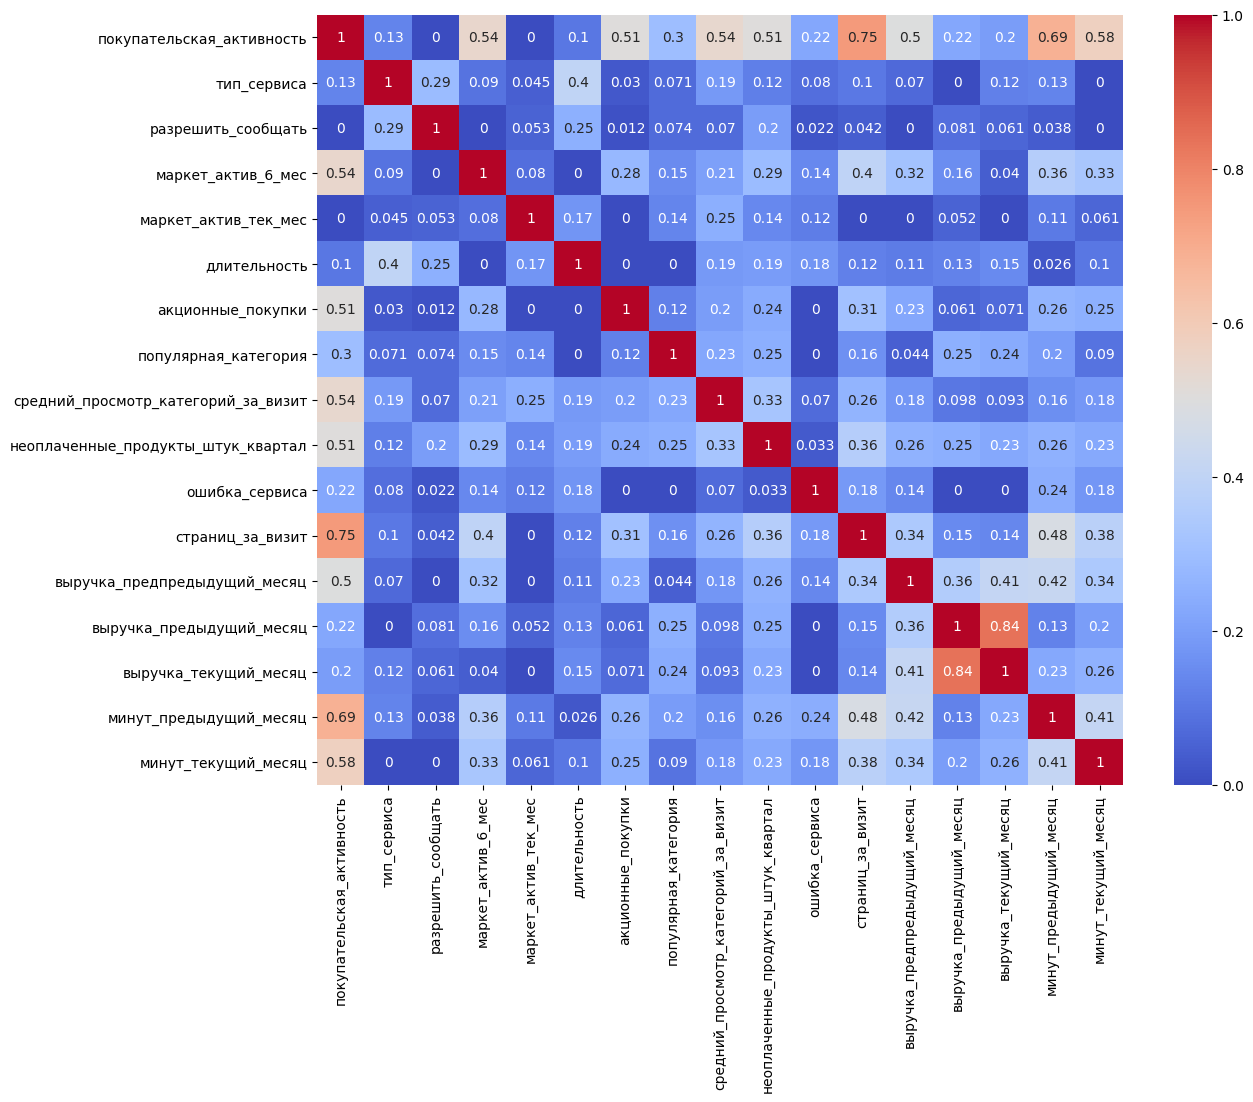

In [52]:
plt.figure(figsize=(13,10))
sns.heatmap(df_full.phik_matrix(interval_cols=num_columns), annot=True, cmap='coolwarm');

**Матрица Phik:**  

- Сильную связь покупательская активность имеет с  
  - количеством страниц за визит (0.75)  
  - количеством минут в предыдущем (0.69) и текущем (0.58) месяцах  
  
- Средняя связь таргета отмечается со следующими признаками:
  - маркет_актив_6_мес (0.54)
  - средний_просмотр_категорий_за_визит (0.54)
  - акционные_покупки (0.51)
  - неоплаченные_продукты_штук_квартал (0.51)
  
- Отсутсвие связи таргета со следующими признаками:
  - маркет_актив_тек_мес
  - разрешить_сообщать
  Значение 0 с таргетом означает, что между данными признаками и целевой переменной отсутствует любая линейная или нелинейная зависимость. Поэтому, признаки вероятно будут бесполезными для регрессионной модели.
  
- Вероятное наличие мультиколлинеарности:
  - сильная связь выручки за текущий месяц с предыдущим (0.84).

In [53]:
calculate_vif(df_full, num_columns)

,Feature,VIF
0,маркет_актив_6_мес,1.220849
1,маркет_актив_тек_мес,1.044578
2,длительность,1.099452
3,акционные_покупки,1.185679
4,средний_просмотр_категорий_за_визит,1.178602
5,неоплаченные_продукты_штук_квартал,1.198629
6,ошибка_сервиса,1.079350
7,страниц_за_визит,1.418264
8,выручка_предпредыдущий_месяц,1.612075
9,выручка_предыдущий_месяц,4.263015


**VIF**  

Полученные значения VIF говорят об отсутствии корреляции между признаком.  
Отмечается умеренная корреляция выручка_предыдущий_месяц (4.3) и выручка_текущий_месяц (3.9). Признаки имеют небольшую зависимость от других признаков.

### Признаки для обучения модели и для прогнозирования.

**Группы признаков**  

1. Признаки, которые описывают коммуникацию сотрудников компании с клиентом  
   - 'разрешить_сообщать': разрешение на маркетинговую коммуникацию.
   - 'маркет_актив_6_мес': вовлеченность в маркетинговые активности за 6 месяцев.
   - 'маркет_актив_тек_мес': текущая активность в маркетинговых коммуникациях.
   - 'ошибка_сервиса': количество ошибок сервиса, влияющих на клиента.
2. Признаки, которые описывают продуктовое поведение покупателя  
   - 'акционные_покупки': участие в акциях и покупке товаров по скидке.
   - 'популярная_категория': предпочтение определенных категорий товаров.
   - 'неоплаченные_продукты_штук_квартал': неоплаченные товары за квартал.
3. Признаки, которые описывают покупательское поведение клиента  
   - 'покупательская_активность': общая характеристика покупательской активности.
   - 'выручка_предпредыдущий_месяц': финансовый вклад клиента два месяца назад.
   - 'выручка_предыдущий_месяц': финансовый вклад клиента месяц назад.
   - 'выручка_текущий_месяц': текущая финансовая активность.
   - 'длительность': длительность взаимодействия клиента с магазином.
4. Признаки, которые описывают поведение покупателя на сайте  
   - 'страниц_за_визит': количество просмотренных страниц за визит.
   - 'минут_предыдущий_месяц': время, проведенное на сайте в предыдущем месяце.
   - 'минут_текущий_месяц': время, проведенное на сайте в текущем месяце.
   - 'средний_просмотр_категорий_за_визит': среднее количество категорий, просмотренных за визит.

**Предлагается изменить некоторые признаки следующим образом:**
- Признаки выручки:  
  Вместо трёх признаков (выручка_предпредыдущий_месяц, выручка_предыдущий_месяц, выручка_текущий_месяц) создаём два:
    + `выручка_разница_тек` = `выручка_текущий_месяц` - `выручка_предыдущий_месяц`.
    + `выручка_разница_прошл` = `выручка_предыдущий_месяц` - `выручка_предпредыдущий_месяц`.

In [54]:
df_full['выручка_разница_прошл'] = df_full['выручка_предыдущий_месяц'] - df_full['выручка_предпредыдущий_месяц']
df_full['выручка_разница_тек'] = df_full['выручка_текущий_месяц'] - df_full['выручка_предыдущий_месяц']
df_full = df_full.drop(['выручка_текущий_месяц', 'выручка_предыдущий_месяц', 'выручка_предпредыдущий_месяц'], axis=1)

df_full[['выручка_разница_прошл', 'выручка_разница_тек']].head(5)

,выручка_разница_прошл,выручка_разница_тек
id,,
215349,744.0,-244.4
215350,631.5,-399.1
215351,1365.0,452.4
215352,1213.5,65.0
215353,-385.5,650.0


In [55]:
num_columns = df_full.select_dtypes(include=['number']).columns
num_columns

Index(['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'минут_предыдущий_месяц', 'минут_текущий_месяц',
       'выручка_разница_прошл', 'выручка_разница_тек'],
      dtype='object')

### Изучим взаимосвязь между отобранными для обучения модели признаками

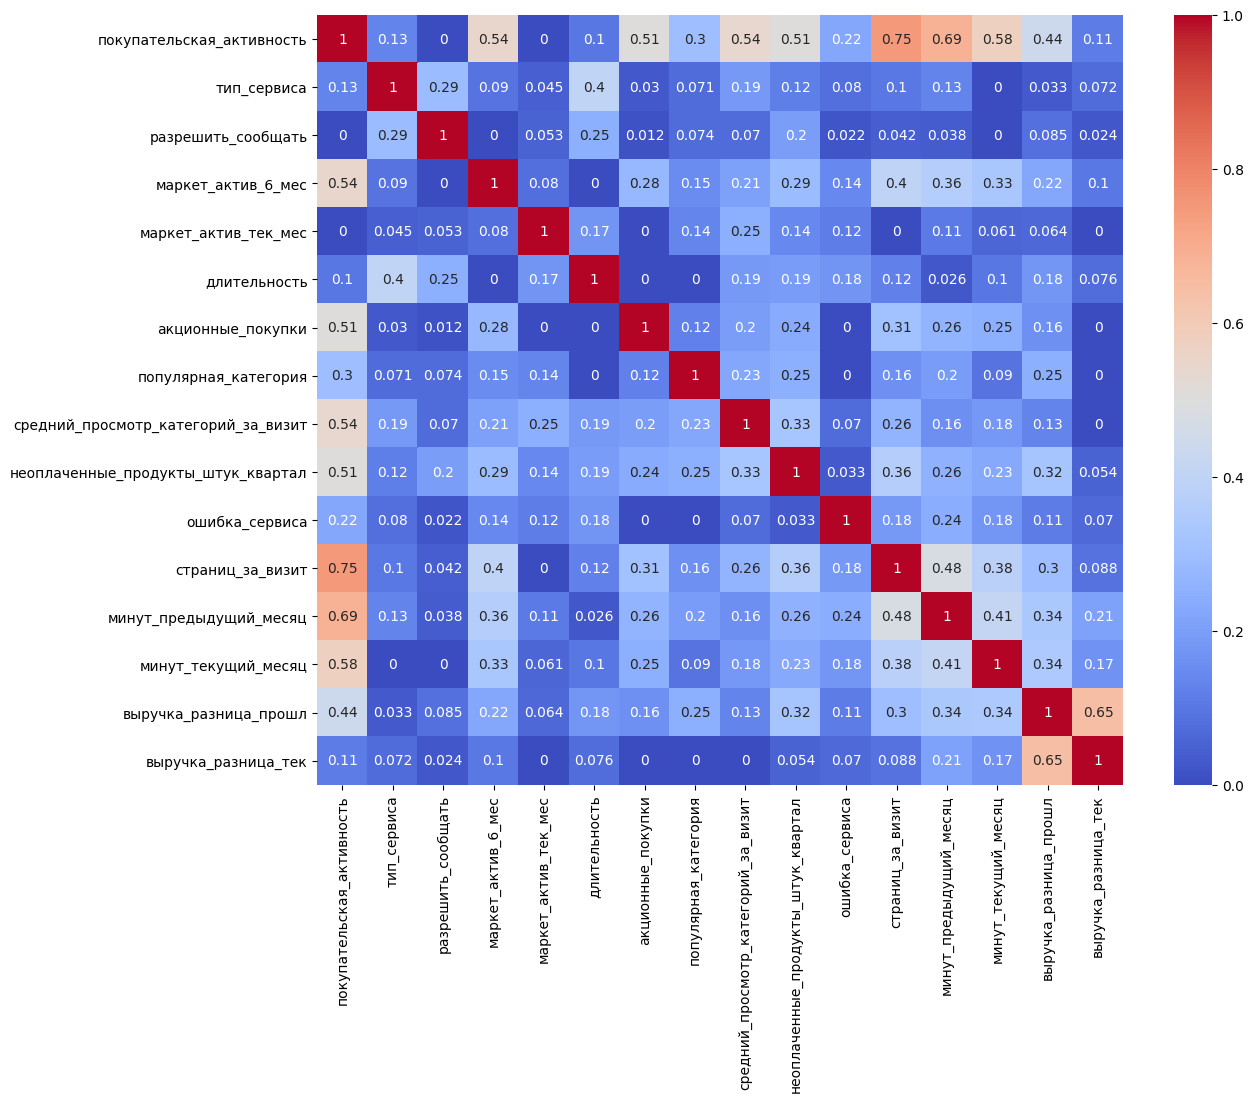

In [56]:
plt.figure(figsize=(13,10))
sns.heatmap(
    df_full.phik_matrix(interval_cols=num_columns),
    annot=True,
    cmap='coolwarm'
);

Отмечается, что после преобразования данных по выручке мультиколлинеарность полностью устранена.

In [57]:
calculate_vif(df_full, num_columns)

,Feature,VIF
0,маркет_актив_6_мес,1.206005
1,маркет_актив_тек_мес,1.042356
2,длительность,1.095606
3,акционные_покупки,1.183476
4,средний_просмотр_категорий_за_визит,1.177631
5,неоплаченные_продукты_штук_квартал,1.167044
6,ошибка_сервиса,1.078775
7,страниц_за_визит,1.394439
8,минут_предыдущий_месяц,1.500260
9,минут_текущий_месяц,1.304996


### Выводы по шагу 5.

**Преобразовали признаки** 
- Признаки выручки:  
  Вместо трёх признаков (выручка_предпредыдущий_месяц, выручка_предыдущий_месяц, выручка_текущий_месяц) создали два:
    + `выручка_разница_тек`
    + `выручка_разница_прошл`

**Матрица Phik:**  
- Сильную связь покупательская активность имеет с  
  - количеством страниц за визит (0.75)  
  - количеством минут в предыдущем (0.69) и текущем (0.58) месяцах  
  
- Средняя связь таргета отмечается со следующими признаками:
  - маркет_актив_6_мес (0.54)
  - средний_просмотр_категорий_за_визит (0.54)
  - акционные_покупки (0.51)
  - неоплаченные_продукты_штук_квартал (0.51)
  
- Отсутсвие связи таргета со следующими признаками:
  - маркет_актив_тек_мес
  - разрешить_сообщать
  Значение 0 с таргетом означает, что между данными признаками и целевой переменной отсутствует любая линейная или нелинейная зависимость. Поэтому, признаки можно считать бесполезным для модели.
  
- Вероятное наличие мультиколлинеарности:
  - сильная связь выручки за текущий месяц с предыдущим (0.84). После преобразования данных - мультиколлинеарности отсутствует.
  
**VIF**  
- Полученные значения VIF говорят об отсутствии корреляции между признаками.  
  Отмечается умеренная корреляция выручка_предыдущий_месяц и выручка_текущий_месяц. Признаки имеют небольшую зависимость от других признаков. После преобразования данных - корреляция между признаками отсутствует.

## Шаг 6. Использование пайплайнов.

Создадим списки с признаками для обучения и для предсказаний, а также установим target.

In [58]:
full_features = df_full.drop('покупательская_активность', axis=1).columns
ohe_columns = ['популярная_категория', 'разрешить_сообщать']
ord_columns = ['тип_сервиса']
num_columns = df_full.select_dtypes(include=['number']).columns
target = 'покупательская_активность'
full_features

Index(['тип_сервиса', 'разрешить_сообщать', 'маркет_актив_6_мес',
       'маркет_актив_тек_мес', 'длительность', 'акционные_покупки',
       'популярная_категория', 'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'минут_предыдущий_месяц', 'минут_текущий_месяц',
       'выручка_разница_прошл', 'выручка_разница_тек'],
      dtype='object')

### Подготовка пайплайна.

#### Делим датасет на выборки.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    df_full.drop(target, axis=1),
    df_full[target],
    stratify=df_full[target],
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

((972, 15), (324, 15))

In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972 entries, 215858 to 216030
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   тип_сервиса                          972 non-null    object 
 1   разрешить_сообщать                   972 non-null    object 
 2   маркет_актив_6_мес                   972 non-null    float64
 3   маркет_актив_тек_мес                 972 non-null    int64  
 4   длительность                         972 non-null    int64  
 5   акционные_покупки                    972 non-null    float64
 6   популярная_категория                 972 non-null    object 
 7   средний_просмотр_категорий_за_визит  972 non-null    int64  
 8   неоплаченные_продукты_штук_квартал   972 non-null    int64  
 9   ошибка_сервиса                       972 non-null    int64  
 10  страниц_за_визит                     972 non-null    int64  
 11  минут_предыдущий_месяц  

#### Кодируем целевой признак `покупательская_активность`.

In [61]:
y_train.unique()

array(['прежний_уровень', 'снизилась'], dtype=object)

In [62]:
# "1" - означает "снизилась", "0" - "прежний_уровень"
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train = label_encoder.transform(y_train) 
y_test = label_encoder.transform(y_test) 
label_encoder.classes_

array(['прежний_уровень', 'снизилась'], dtype=object)

#### Создаём общий пайплайн для подготовки данных.

Полиномиальные признаки второго порядка только ухудшили метрики, даже при применении порога важности признаков. Поэтому в рамках данного проекта не будем их применять.

In [63]:
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe',
            OneHotEncoder(drop='first', handle_unknown='error', sparse=False))
    ]
)

ord_pipe = Pipeline(
    [
        ('simpleimputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ord', OrdinalEncoder(
                    categories=[['премиум', 'стандарт']],
                    handle_unknown='use_encoded_value',
                    unknown_value=np.nan)),
        ('simple_imputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

num_pipe = Pipeline([
    ('scaler', MinMaxScaler())  # Масштабирование
#    ,('poly', PolynomialFeatures(degree=2, include_bias=False))  # Полиномиальные признаки
])

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', num_pipe, num_columns)
    ],
    remainder='passthrough'
)


#### Создаём итоговый пайплайн: подготовка данных и модель.

In [64]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('selector', SelectKBest(score_func=f_classif, k=10)),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

#### Определим метрики для отслеживания.

Для определения гиперпараметров модели воспользуемся несколькими метриками:  
- ROC-AUC. Измеряет качество ранжирования: насколько хорошо модель отделяет клиентов, которые снизят активность, от тех, кто нет. Учитывает работу модели при всех возможных значениях порогов.  
- Recall (основная). Отвечает на вопрос: "Сколько из всех реальных случаев снижения активности модель нашла?". Важна, так как цель — не пропустить клиента с риском снижения активности и вовремя принять меры.  
- Precision показывает, сколько из предсказанных как "снижение активности" клиентов действительно принадлежат этому классу. Это поможет избежать "ложных тревог".
- fbeta-метрика с акцентом на recall

**Установим следующие приоритеты:**  
1) Обнаружение всех клиентов с пониженной активностью (Recall).  
2) Хорошее ранжирование вероятностей (ROC-AUC).  
3) fbeta-метрика с акцентом на recall (beta=3).


In [65]:
fnr_score = make_scorer(
    get_false_negative_rate,
    greater_is_better=False
)

fbeta_scorer = make_scorer(
    fbeta_score,
    beta=3,
    greater_is_better=True
)

In [66]:
scoring_dict = { 
    'fbeta_score' : fbeta_scorer,    
    'roc_auc_score' : 'roc_auc',
    'recall_score' : 'recall',
    'precision_score' : 'precision'
}
scoring_main = 'recall'

refit_manage = fbeta_scorer

### Обучим четыре модели: KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression и  SVC.

In [67]:
# Создадим словарь для хранения лучших моделей
best_estimators = {}

#### Определим с помощью OptunaSearchCV гиперпараметры для всех 4-х моделей. 

Для OptunaSearchCV создадим свой список со словарями параметров для каждой модели. Причем, для OptunaSearchCV установим несколько больший диапозон гиперпараметров.

In [68]:
# пространство параметров для OptunaSearchCV
optuna_search_spaces = {
    'knn': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'models__n_neighbors': distributions.IntDistribution(low=20, high=90, step=10),
            'models__weights': distributions.CategoricalDistribution(['uniform', 'distance']),
            'models__metric': distributions.CategoricalDistribution(['euclidean', 'manhattan', 'minkowski']),
            'selector__score_func': distributions.CategoricalDistribution([f_classif, mutual_info_classif]),
            'selector__k': distributions.IntDistribution(low=4, high=20, step=1)
        }
    },
    'dtree': {
        'model': DecisionTreeClassifier(random_state=RANDOM_STATE),
        'param_grid': {
            'models__max_depth': distributions.IntDistribution(low=2, high=15, step=2),
            'models__max_features': distributions.CategoricalDistribution([None, 'sqrt', 'log2']),
            'models__min_samples_split': distributions.IntDistribution(low=2, high=8, step=1),
            'models__min_samples_leaf': distributions.IntDistribution(low=2, high=8, step=1),
#             'models__criterion': distributions.CategoricalDistribution(['gini', 'entropy']),
            'selector__score_func': distributions.CategoricalDistribution([f_classif, mutual_info_classif]),
            'selector__k': distributions.IntDistribution(low=5, high=20, step=1)
        }
    },
    'lr': {
        'model': LogisticRegression(random_state=RANDOM_STATE),
        'param_grid': {
            'models__C': distributions.FloatDistribution(low=0.1, high=100),
            'models__penalty': distributions.CategoricalDistribution(['l1', 'l2']),
#             'models__solver': distributions.CategoricalDistribution(['liblinear', 'saga']),
            'models__max_iter': distributions.IntDistribution(low=100, high=1000, step=100),
            'selector__score_func': distributions.CategoricalDistribution([f_classif, mutual_info_classif]),
            'selector__k': distributions.IntDistribution(low=4, high=20, step=1)
        }
    },
    'svc': { 
        'model': SVC(random_state=RANDOM_STATE, probability=True),
        'param_grid': {
            'models__C': distributions.FloatDistribution(low=0.1, high=100),
            'models__kernel': distributions.CategoricalDistribution(['linear', 'rbf', 'poly', 'sigmoid']),
            'models__gamma': distributions.CategoricalDistribution(['auto', 0.01, 0.1, 0.5]),
            'models__class_weight': distributions.CategoricalDistribution([None, 'balanced']),
            'selector__score_func': distributions.CategoricalDistribution([f_classif, mutual_info_classif]),
            'selector__k': distributions.IntDistribution(low=5, high=20, step=1)
        }
    }
}


In [69]:
#### Общее время поиска: 9 минут 8 секунд 

start_time = time.time()
optuna.logging.set_verbosity(optuna.logging.ERROR)

# Оптимизация гиперпараметров для каждой модели
for model_name, model_config in optuna_search_spaces.items():
    pipeline = Pipeline([
        ('preprocessor', data_preprocessor),
        ('selector', SelectKBest()),
        ('models', model_config['model'])
    ])
    optuna_search = OptunaSearchCV(
        pipeline,
        model_config['param_grid'],
        cv=10,
        n_jobs=-1,
        n_trials=100,
        scoring=scoring_main,
        random_state=RANDOM_STATE
    )
    optuna_search.fit(X_train, y_train)
    
    best_estimators[model_name, 'OptunaSearch'] = {
        'best_model': optuna_search.best_estimator_,
        'best_params': optuna_search.best_params_,
        'best_score': optuna_search.best_score_,
        'best_results': optuna_search.trials_dataframe(),
        'optuna_search': optuna_search  
    }


end_time = time.time()
elapsed_time = end_time - start_time
minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)
print(f"Общее время поиска: {minutes} минут {seconds} секунд \n")

Общее время поиска: 2 минут 42 секунд 



In [70]:
for key, value in best_estimators.items():
    model_name, search_method = key
    best_score = value['best_score']
    best_params = value['best_params']
    print(f'Модель: {model_name}, Метод поиска: {search_method}, Лучший {scoring_main}: {best_score:.4f}')
    print(f'Параметры модели: \n {best_params}')
    print('='*60)

Модель: knn, Метод поиска: OptunaSearch, Лучший recall: 0.8088
Параметры модели: 
 {'models__n_neighbors': 70, 'models__weights': 'distance', 'models__metric': 'euclidean', 'selector__score_func': <function f_classif at 0x000001C74D645CA0>, 'selector__k': 5}
Модель: dtree, Метод поиска: OptunaSearch, Лучший recall: 0.7817
Параметры модели: 
 {'models__max_depth': 12, 'models__max_features': None, 'models__min_samples_split': 2, 'models__min_samples_leaf': 2, 'selector__score_func': <function f_classif at 0x000001C74D645CA0>, 'selector__k': 15}
Модель: lr, Метод поиска: OptunaSearch, Лучший recall: 0.7710
Параметры модели: 
 {'models__C': 96.41282207372528, 'models__penalty': 'l2', 'models__max_iter': 900, 'selector__score_func': <function mutual_info_classif at 0x000001C74D668AF0>, 'selector__k': 6}
Модель: svc, Метод поиска: OptunaSearch, Лучший recall: 0.8113
Параметры модели: 
 {'models__C': 0.49331548975355455, 'models__kernel': 'poly', 'models__gamma': 0.5, 'models__class_weight':

Модель - SVC с параметрами от OptunaSearch при кросс-валидации показывает на тренировочной выборке recall = 1.0. То есть находит 100% клиентов с риском снижения активности. При этом, precision указанной модели сильно снизился (до 0.38), то есть дает очень много ложноположительных ответов.

Хороший результат recall (0.8115) показала модель knn. Обучим и проверим все четыре модели по всем интересующим нас метрикам с помощью кросс-валидации.


In [71]:
results_df = pd.DataFrame(columns=['model_name', 'fbeta_score_mean', 'recall_score_mean', 'precision_score_mean', 'roc_auc_score_mean'])

for key, value in best_estimators.items():
    model_name, search_method = key
    estimator = value['best_model']
    cross_val_scoring(estimator, X_train, y_train, results_df, model_name)
    
results_df

,model_name,fbeta_score_mean,recall_score_mean,precision_score_mean,roc_auc_score_mean
0,knn,0.822633,0.816785,0.881684,0.893912
1,dtree,0.738599,0.733286,0.798202,0.815055
2,lr,0.764887,0.754908,0.869672,0.886630
3,svc,0.805598,0.811522,0.759171,0.889483


По результатам кросс-валидации лучший результат recall (0.8195) показывает также модель knn (кроме svc=1.0). Кроме того, эта модель knn имеет хороший показатель roc_auc (0.8936).  

При помощи GridSearchCV попробуем улучшить показатели моделей SVC и knn.

#### Определим с помощью GridSearch гиперпараметры для моделей SVC и knn.

Создадим список со словарями параметров для каждой модели.
Для каждой модели установим свой набор гиперпараметров.  
В этот раз параметры будем подбирать в узком диапазоне.

In [72]:
# пространство параметров для GridSearchCV
grid_search_spaces = {
    'knn': { 
        'model': KNeighborsClassifier(),
        'param_grid': {
            'models__n_neighbors': range(65, 70),
            'models__weights': ['distance'], # ['uniform', 'distance'],
            'models__metric': ['euclidean'], #  ['euclidean', 'manhattan', 'minkowski'],
            'selector__score_func': [f_classif], # [f_classif, mutual_info_classif],
            'selector__k': range(4, 6)
        }
    },
#     'dtree': {
#         'model': DecisionTreeClassifier(random_state=RANDOM_STATE),
#         'param_grid': {
#             'models__max_depth': range(4, 20, 2),
#             'models__max_features': [None, 'sqrt', 'log2'],
#             'models__min_samples_split': range(2, 8, 2),
#             'models__min_samples_leaf': range(1, 7, 2),
#             'models__criterion': ['gini', 'entropy'],
#             'selector__score_func': [f_classif, mutual_info_classif],
#             'selector__k': range(4, 20, 2)
#         }
#     },
#     'lr': {
#         'model': LogisticRegression(random_state=RANDOM_STATE),
#         'param_grid': {
#             'models__C': [0.1, 1, 10, 50],
#             'models__penalty': ['l1', 'l2'],
#             'models__solver': ['liblinear', 'saga'],
#             'models__max_iter': [500, 1000],
#             'selector__score_func': [f_classif, mutual_info_classif],
#             'selector__k': range(4, 20, 2)
#         }
#     },
    'svc': { 
        'model': SVC(random_state=RANDOM_STATE, probability=True),
        'param_grid': {
            'models__C': np.arange(0.33, 0.34, 0.01),  # [1, 10, 50], 
            'models__kernel': ['rbf', 'sigmoid'], # 'rbf', 'sigmoid', 'poly'
            'models__gamma': ['scale'], # 'auto', 'scale'
            'models__class_weight': ['balanced'],
            'selector__score_func': [mutual_info_classif], # f_classif, 
            'selector__k': range(5, 20)
        }
    }
}

In [73]:
# Общее время поиска: 2 минут 29 секунд

start_time = time.time()

# Оптимизация гиперпараметров для каждой модели
for model_name, model_config in grid_search_spaces.items():
    pipeline = Pipeline([
        ('preprocessor', data_preprocessor),
        ('selector', SelectKBest()),
        ('models', model_config['model'])
    ])
    
    # GridSearchCV для текущей модели
    grid_search = GridSearchCV(
        pipeline,
        model_config['param_grid'],
        cv=10,
#         scoring=scoring_grid,
        scoring=scoring_main,
        refit=True,
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)

    best_estimators[model_name, 'GridSearchCV'] = {
        'best_model': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'best_results': grid_search.cv_results_,
        'optuna_search': grid_search  
    }

end_time = time.time()
elapsed_time = end_time - start_time
minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)
print(f"Общее время поиска: {minutes} минут {seconds} секунд")


Общее время поиска: 0 минут 12 секунд


In [74]:
for key, value in best_estimators.items():
    model_name, search_method = key
    best_score = value['best_score']
    best_params = value['best_params']
    print(f'Модель: {model_name}, Метод поиска: {search_method}, Лучший {scoring_main}: {best_score:.4f}')
    print(f'Параметры модели: \n {best_params}')
    print('='*60)

Модель: knn, Метод поиска: OptunaSearch, Лучший recall: 0.8088
Параметры модели: 
 {'models__n_neighbors': 70, 'models__weights': 'distance', 'models__metric': 'euclidean', 'selector__score_func': <function f_classif at 0x000001C74D645CA0>, 'selector__k': 5}
Модель: dtree, Метод поиска: OptunaSearch, Лучший recall: 0.7817
Параметры модели: 
 {'models__max_depth': 12, 'models__max_features': None, 'models__min_samples_split': 2, 'models__min_samples_leaf': 2, 'selector__score_func': <function f_classif at 0x000001C74D645CA0>, 'selector__k': 15}
Модель: lr, Метод поиска: OptunaSearch, Лучший recall: 0.7710
Параметры модели: 
 {'models__C': 96.41282207372528, 'models__penalty': 'l2', 'models__max_iter': 900, 'selector__score_func': <function mutual_info_classif at 0x000001C74D668AF0>, 'selector__k': 6}
Модель: svc, Метод поиска: OptunaSearch, Лучший recall: 0.8113
Параметры модели: 
 {'models__C': 0.49331548975355455, 'models__kernel': 'poly', 'models__gamma': 0.5, 'models__class_weight':

In [75]:
results_df = pd.DataFrame(columns=['model_name', 'fbeta_score_mean', 'recall_score_mean', 'precision_score_mean', 'roc_auc_score_mean'])

for key, value in best_estimators.items():
    model_name, search_method = key
    estimator = value['best_model']
    cross_val_scoring(estimator, X_train, y_train, results_df, model_name)
    
results_df

,model_name,fbeta_score_mean,recall_score_mean,precision_score_mean,roc_auc_score_mean
0,knn,0.822633,0.816785,0.881684,0.893912
1,dtree,0.738599,0.733286,0.798202,0.815055
2,lr,0.764887,0.754908,0.869672,0.886630
3,svc,0.805598,0.811522,0.759171,0.889483
4,knn,0.824913,0.819488,0.878791,0.892944
5,svc,0.785585,0.776387,0.881027,0.909949


**Вывод**  
Модель - SVC с параметрами от OptunaSearch при кросс-валидации показывает на тренировочной выборке recall = 1.0. То есть находит 100% клиентов с риском снижения активности. При этом, precision указанной модели сильно снизился (до 0.38), то есть дает очень много ложноположительных ответов.

Хороший результат recall (0.819488) показала модель knn с параметрами от GridSearchCV при сбалансированном precision (0.878791) и хорошим roc_auc (0.892944).

Таким образом, лучше остановиться на модели knn GridSearchCV.  
Параметры модели knn:  
'models__n_neighbors': 67,  
'models__weights': 'distance',  
'models__metric': 'euclidean',   
'selector__score_func': <function f_classif at 0x7fa6764023a0>,  
'selector__k': 5

### Для дополнительного анализа полученных моделей построим графики точности и полноты (Precision и Recall)

Модель: dtree, Метод поиска: OptunaSearch


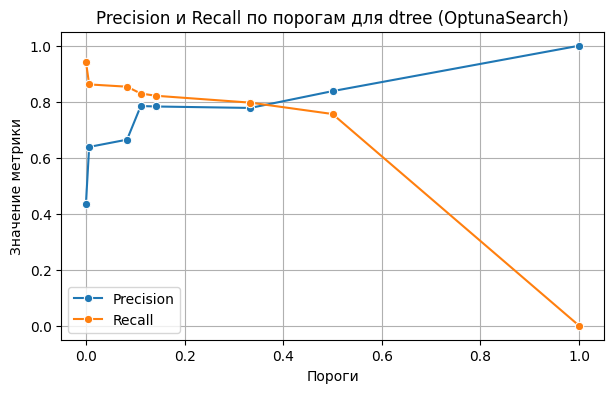

Модель: knn, Метод поиска: GridSearchCV


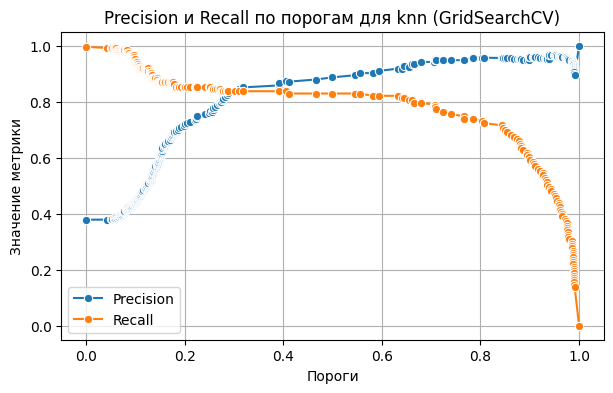

Модель: knn, Метод поиска: OptunaSearch


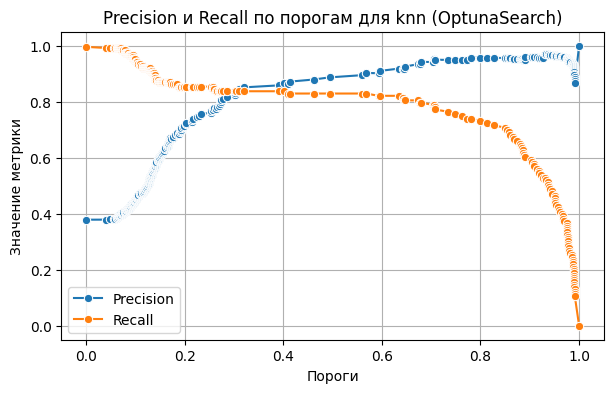

Модель: lr, Метод поиска: OptunaSearch


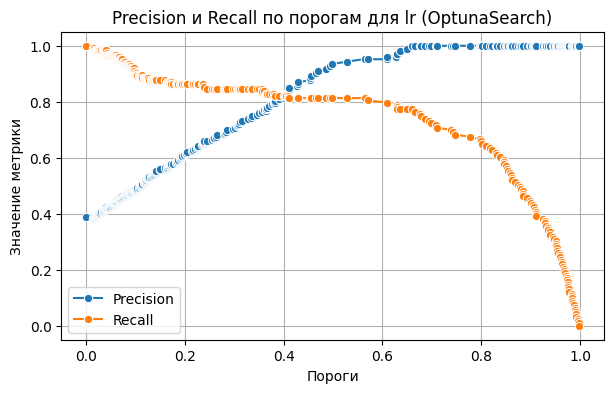

Модель: svc, Метод поиска: GridSearchCV


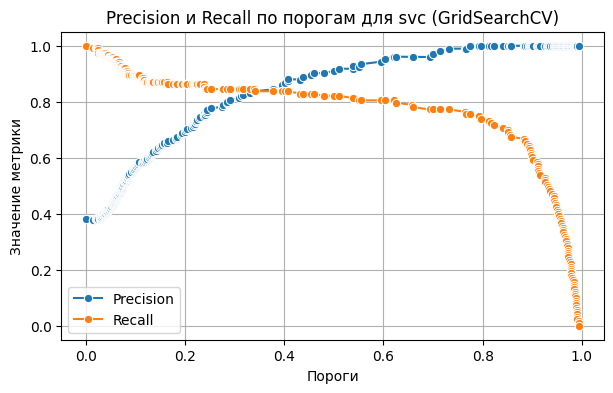

Модель: svc, Метод поиска: OptunaSearch


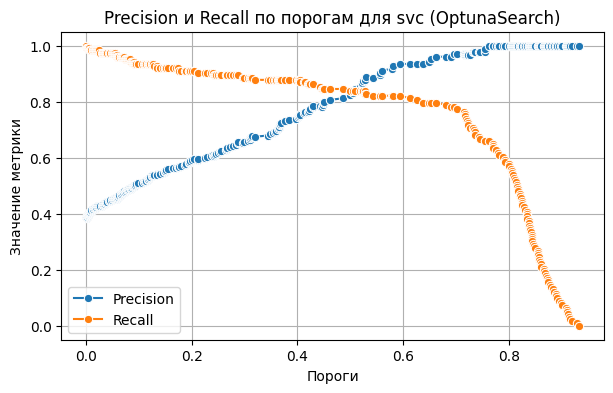

In [76]:
# Цикл по моделям в best_estimators
for (model_name, search_method), model_data in sorted(best_estimators.items(), key=lambda x: (x[0], x[1])):
    print(f"Модель: {model_name}, Метод поиска: {search_method}")
    
    # Извлечение лучшей модели и препроцессора, предобработка тестовых данных
    best_model_pipeline = model_data['best_model']
    preprocessor = best_model_pipeline[:-1]
    final_model = best_model_pipeline.named_steps['models']

    preprocessed_X_train = preprocessor.transform(X_train)
    preprocessed_X_test = preprocessor.transform(X_test)
    
    preprocessed_X_test = preprocessor.transform(X_test)
    
    
    if hasattr(final_model, 'predict_proba'):
        probs = final_model.predict_proba(preprocessed_X_test)[:, 1]
    else:
        print(f"Модель {model_name} не поддерживает настройку порога.")
        continue
   
    # Построение Precision-Recall кривой
    precisions, recalls, thresholds = precision_recall_curve(y_test, probs)
    precisions_df = pd.DataFrame({
        'threshold': np.concatenate(([0], thresholds)),
        'precision': precisions,
        'recall': recalls
    })

    plt.figure(figsize=(7, 4))
    sns.lineplot(x='threshold', y='precision', data=precisions_df, label='Precision', marker='o')
    sns.lineplot(x='threshold', y='recall', data=precisions_df, label='Recall', marker='o')

    plt.title(f'Precision и Recall по порогам для {model_name} ({search_method})')
    plt.xlabel('Пороги')
    plt.ylabel('Значение метрики')
    plt.legend()
    plt.grid(True)
    plt.show()

Графики Precision-Recall также подтверждают, что модель knn (с параметрами от GridSearchCV) - показывает хороший результат.  

### Проверим качество лучшей модели (knn с параметрами от GridSearchCV) на тестовой выборке.

In [77]:
best_model_pipeline = best_estimators['knn', 'GridSearchCV']['best_model']
best_preprocessor = best_model_pipeline[:-1]
best_model = best_model_pipeline[-1]
preprocessed_X_train = best_preprocessor.transform(X_train)
preprocessed_X_test = best_preprocessor.transform(X_test)

best_model

KNeighborsClassifier(metric='euclidean', n_neighbors=67, weights='distance')

In [78]:

y_pred = best_model.predict(preprocessed_X_test)
y_pred_proba = best_model.predict_proba(preprocessed_X_test)[:, 1]

# Метрики
recall_test = recall_score(y_test, y_pred, average='binary')
precision_test = precision_score(y_test, y_pred, average='binary')
roc_auc_test = roc_auc_score(y_test, y_pred_proba)
FNR_test = get_false_negative_rate(y_test, y_pred)

# Вывод
print(f"Метрика FNR на тестовой выборке: {-FNR_test}\n")
print(f"Метрика recall на тестовой выборке: {recall_test}\n")
print(f"Метрика precision на тестовой выборке: {precision_test}\n")
print(f"Метрика ROC-AUC на тестовой выборке: {roc_auc_test}\n")

Метрика FNR на тестовой выборке: 0.17073170731707318

Метрика recall на тестовой выборке: 0.8292682926829268

Метрика precision на тестовой выборке: 0.8869565217391304

Метрика ROC-AUC на тестовой выборке: 0.8949965619059175



Модель на тестовой выборке показала хороший recall (0.8293) и ROC-AUC (0.8950) при высоком precision (0.8870).

### Выводы по шагу 6.

На этом этапе был реализован полный процесс предобработки данных, выбора признаков и обучения моделей с оптимизацией гиперпараметров. Основные шаги включают:  

1) Разделение данных на тренировочную и тестовую выборки.  
   Целевой признак — "покупательская активность".  
   Использовалась стратификация, чтобы сохранить пропорции классов в обеих выборках.  
   
2) Кодирование целевой переменной  
   - Класс "1" — снижение покупательской активности, "0" — сохранение прежнего уровня.
     Для кодирования использован LabelEncoder.  
     
3) Создание пайплайнов для обработки признаков.  
   - Категориальные признаки (OHE): Применение OneHotEncoding с предварительным заполнением пропусков.
   - Порядковые признаки (OrdinalEncoder): Кодирование с учетом заданного порядка категорий, включая этапы обработки пропусков до и после кодирования.
   - Числовые признаки: Масштабирование с использованием MinMaxScaler. Полиномиальные признаки второго порядка были исключены из-за ухудшения метрик.  
   
4) Выбор признаков.  
   Использован метод SelectKBest с функциями f_classif и mutual_info_classif для отбора наиболее значимых признаков.

5) Оптимизация гиперпараметров моделей.  
   Для оптимизации применялись OptunaSearchCV и GridSearchCV.  
   Метрики для подбора гиперпараметров:  
   - Основная: Recall (максимизация обнаружения клиентов с пониженной активностью).
   - Дополнительные: ROC-AUC, Precision, fbeta-score (с акцентом на Recall).  

6) Модели, участвующие в оптимизации. 
   - KNeighborsClassifier (KNN): Оптимизация количества соседей, веса и метрики расстояний.
   - DecisionTreeClassifier: Оптимизация глубины дерева, количества признаков и минимального числа объектов в узле.
   - LogisticRegression: Настройка параметров регуляризации, штрафов и максимального числа итераций.
   - SVC: Оптимизация параметров ядра, коэффициента регуляризации и класса весов.  

7) Результаты подбора гиперпараметров.  
   Оптимизировано все 4е модели при помощи OptunaSearchCV и дополнительно 2 модели (svc, knn) при помощи GridSearchCV.  
   Сравнение результатов каждой модели проведено по нескольким метрикам.   
   
8) Кросс-валидация и итоговая оценка.  
   Проведена кросс-валидация с использованием пайплайна для каждой модели.  
   Оценены средние значения метрик (Recall, Precision, fbeta-score, ROC-AUC) на обучающей выборке.   

**Вывод**  
Модель - SVC с параметрами от OptunaSearch при кросс-валидации показывает на тренировочной выборке recall = 1.0. То есть находит 100% клиентов с риском снижения активности. При этом, precision указанной модели сильно снизился (до 0.38), то есть дает очень много ложноположительных ответов.

Хороший результат recall (0.819488) показала модель knn с параметрами от GridSearchCV при сбалансированном precision (0.878791) и хорошим roc_auc (0.892944).  

Таким образом, лучше остановиться на модели knn GridSearchCV.    

Параметры модели knn:  
'models__n_neighbors': 67,  
'models__weights': 'distance',  
'models__metric': 'euclidean',   
'selector__score_func': <function f_classif at 0x7fa6764023a0>,  
'selector__k': 5

Модель на тестовой выборке показала хороший recall (0.8293) и ROC-AUC (0.8950) при высоком precision (0.8870).

## Шаг 7. Анализ важности признаков

### Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP. 

In [79]:
# Доступ к отдельным трансформерам в ColumnTransformer
# Для ohe_pipe
ohe_transformer = best_preprocessor[0].transformers_[0][1]  # пайплайн для OHE
# Для ord_pipe
ord_transformer = best_preprocessor[0].transformers_[1][1]  # пайплайн для OrdinalEncoder
# Для num_pipe
num_transformer = best_preprocessor[0].transformers_[2][1]  # пайплайн для PolynomialFeatures

ohe_columns_transformed = ohe_transformer.named_steps['ohe'].get_feature_names(input_features=ohe_columns)
num_columns_transformed = num_columns
ord_columns_transformed = ord_columns

full_feature_names = (
    list(ohe_columns_transformed) + 
    list(ord_columns_transformed) + 
    list(num_columns_transformed)
)

print("Истинные наименования признаков после трансформации до отбора SelectKBest:")
print(full_feature_names)

Истинные наименования признаков после трансформации до отбора SelectKBest:
['популярная_категория_косметика_и_аксесуары', 'популярная_категория_кухонная_посуда', 'популярная_категория_мелкая_бытовая_техника_и_электроника', 'популярная_категория_техника_для_красоты_и_здоровья', 'популярная_категория_товары_для_детей', 'разрешить_сообщать_нет', 'тип_сервиса', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'минут_предыдущий_месяц', 'минут_текущий_месяц', 'выручка_разница_прошл', 'выручка_разница_тек']


In [80]:
# Получение имен признаков после ColumnTransformer
ohe_feature_names = best_preprocessor[0].named_transformers_['ohe'] \
    .named_steps['ohe'].get_feature_names(ohe_columns)
ord_feature_names = ord_columns  # OrdinalEncoder не изменяет имена признаков
num_feature_names = num_columns  # NumPipe (в данном случае MinMaxScaler) не изменяет имена признаков

# Собираем все имена признаков после ColumnTransformer
all_feature_names = np.concatenate([ohe_feature_names, ord_feature_names, num_feature_names])

# Индексы выбранных признаков из SelectKBest
selected_indices = best_model_pipeline.named_steps['selector'].get_support(indices=True)

# Финальные имена признаков
final_feature_names = all_feature_names[selected_indices]

print("Финальные имена признаков:")
print(final_feature_names)

Финальные имена признаков:
['маркет_актив_6_мес' 'акционные_покупки' 'страниц_за_визит'
 'минут_предыдущий_месяц' 'минут_текущий_месяц']


In [81]:
missing_features = list(set(full_feature_names) - set(final_feature_names))
print("Признаки, которые отсутствуют в final_feature_names:", missing_features)

Признаки, которые отсутствуют в final_feature_names: ['популярная_категория_кухонная_посуда', 'маркет_актив_тек_мес', 'выручка_разница_тек', 'средний_просмотр_категорий_за_визит', 'выручка_разница_прошл', 'длительность', 'популярная_категория_товары_для_детей', 'ошибка_сервиса', 'разрешить_сообщать_нет', 'популярная_категория_мелкая_бытовая_техника_и_электроника', 'популярная_категория_косметика_и_аксесуары', 'популярная_категория_техника_для_красоты_и_здоровья', 'неоплаченные_продукты_штук_квартал', 'тип_сервиса']


In [82]:
# X_train_cut = preprocessed_X_train[:300]
# X_train_cut = shap.sample(preprocessed_X_train, 300, random_state=RANDOM_STATE)
X_train_cut, _, y_train_cut, _ = train_test_split(
    preprocessed_X_train, 
    y_train,
    train_size=300, 
    stratify=y_train,
    random_state=RANDOM_STATE
)

In [83]:
start_time = time.time()

# KernelExplainer для SVC, knn
explainer = shap.KernelExplainer(best_model.predict, X_train_cut)
shap_values = explainer.shap_values(X_train_cut)

end_time = time.time()
elapsed_time = end_time - start_time
minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)
print(f"Общее время поиска: {minutes} минут {seconds} секунд \n")

Using 300 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/300 [00:00<?, ?it/s]

Общее время поиска: 1 минут 17 секунд 



In [84]:
print('Форма preprocessed_X_train:', preprocessed_X_train.shape)
print('Длинна final_feature_names:', len(final_feature_names))
print('Форма shap_values:', shap_values.shape)

Форма preprocessed_X_train: (972, 5)
Длинна final_feature_names: 5
Форма shap_values: (300, 5)


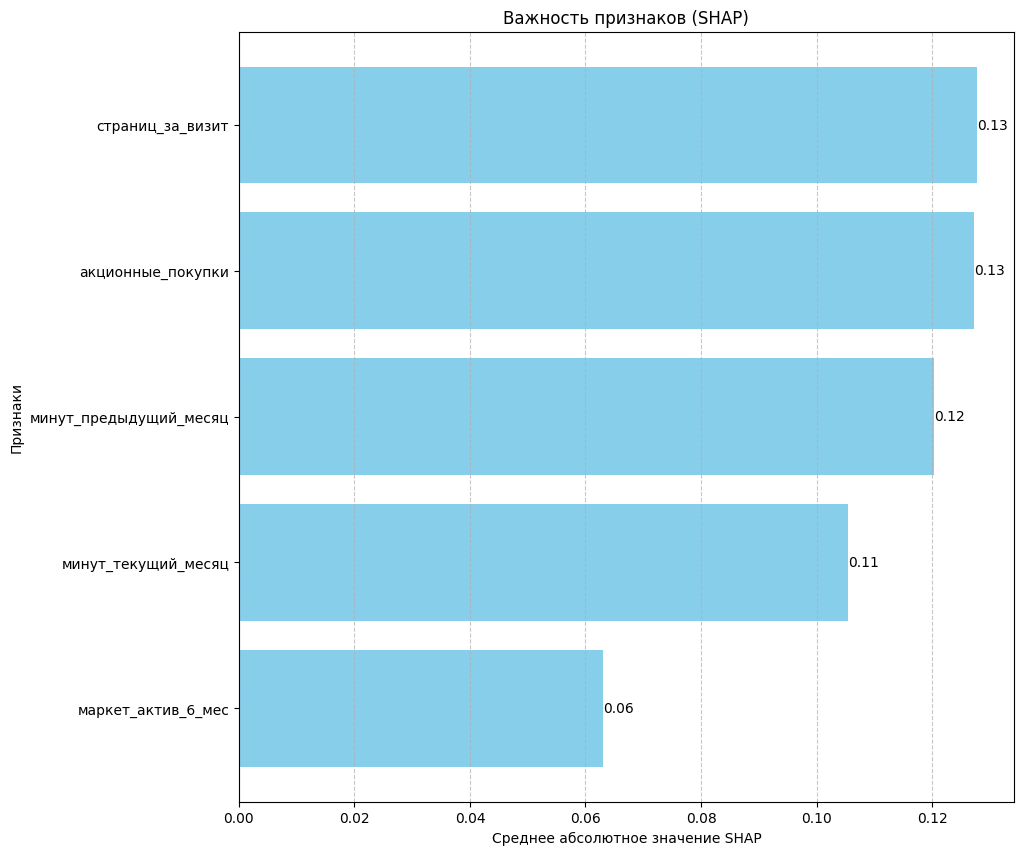

In [85]:
plot_shap_values(shap_values, final_feature_names)

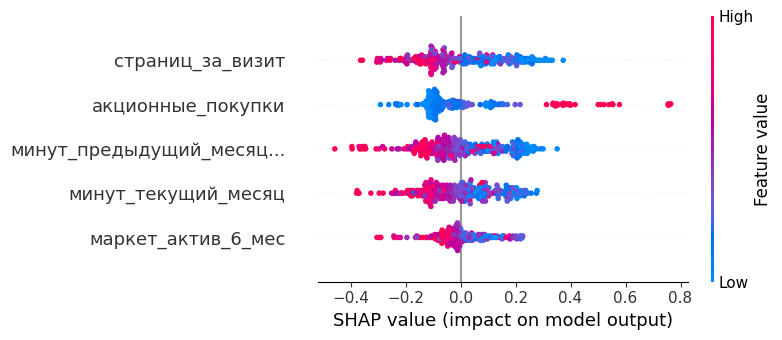

In [86]:
short_names = [name[:28] + '...' if len(name) > 20 else name for name in final_feature_names]
shap.summary_plot(shap_values, X_train_cut, feature_names=short_names)

**Выводы по результатам анализа важности признаков**  

- Наиболее значимые признаки:

   - Количество страниц за визит (страниц_за_визит) — имеет наибольшее среднее абсолютное значение SHAP (0.130). Это указывает на то, что данный признак играет ключевую роль в прогнозировании активности покупателей. Логично предположить, что чем больше страниц просматривает клиент, тем выше вероятность его вовлеченности.
   - Доля акционных покупок (акционные_покупки) — значимость 0.130. Этот показатель указывает на интерес клиента к промо-акциям и выгодным предложениям. Вместе с тем, клиенты, совершающие больше акционных покупок, более склонны к снижению активности, что может говорить о временной заинтересованности в акциях.  
   - Количество минут за предыдущий месяц (0.12) и за текущий месяц (0.11). Он отражает уровень взаимодействия клиента с платформой за недавний и текущий период и также сильно влияет на предсказание.
   - Маркетинговая активность за 6 месяцев (маркет_актив_6_мес) — SHAP (0.06). Это указывает на умеренную зависимость между уровнем маркетинговой активности и покупательским поведением. Клиенты, на которых была направлена активная маркетинговая поддержка, менее склонны к снижению активности.
  

- Признаки с низкой значимостью:
   - в результате отбора признаков с помощью SelectKBest остальные признаки не попали в модель ввиду низкой значимости:   
     - 'выручка_разница_тек',    
     - 'тип_сервиса',    
     - 'неоплаченные_продукты_штук_квартал',     
     - 'длительность',     
     - 'средний_просмотр_категорий_за_визит',    
     - 'маркет_актив_тек_мес',    
     - 'выручка_разница_прошл',    
     - 'разрешить_сообщать_нет',     
     - 'ошибка_сервиса',    
     - все признаки из раздела 'популярная_категория'

In [87]:
# Средние SHAP-значения по всем объектам для каждого признака
mean_abs_shap_values = np.abs(shap_values).mean(axis=0)

# Создаём DataFrame для средней важности признаков
shap_df = pd.DataFrame(mean_abs_shap_values, index=final_feature_names, columns=['mean_abs_shap_values'])

# Сортируем признаки по средней величине SHAP-значений
shap_df = shap_df.sort_values(by='mean_abs_shap_values', ascending=False)

shap_df

,mean_abs_shap_values
страниц_за_визит,0.127773
акционные_покупки,0.127332
минут_предыдущий_месяц,0.120286
минут_текущий_месяц,0.105435
маркет_актив_6_мес,0.062998


### Вывод по шагу 7.

**Выводы по результатам анализа важности признаков**

- Наиболее значимые признаки:

   - **Количество страниц за визит** (страниц_за_визит) — имеет наибольшее среднее абсолютное значение SHAP (0.130). Это указывает на то, что данный признак играет ключевую роль в прогнозировании активности покупателей. Логично предположить, что чем больше страниц просматривает клиент, тем выше вероятность его вовлеченности.
   - **Доля акционных покупок** (акционные_покупки) — значимость 0.130. Этот показатель указывает на интерес клиента к промо-акциям и выгодным предложениям. Вместе с тем, клиенты, совершающие больше акционных покупок, более склонны к снижению активности, что может говорить о временной заинтересованности в акциях.  
   - **Количество минут за предыдущий месяц** (0.12) и **за текущий месяц** (0.11). Он отражает уровень взаимодействия клиента с платформой за недавний и текущий период и также сильно влияет на предсказание.
   - **Маркетинговая активность за 6 месяцев** (маркет_актив_6_мес) — SHAP (0.06). Это указывает на умеренную зависимость между уровнем маркетинговой активности и покупательским поведением. Клиенты, на которых была направлена активная маркетинговая поддержка, менее склонны к снижению активности.
  

- Признаки с низкой значимостью:
   - в результате отбора признаков с помощью SelectKBest остальные признаки не попали в модель ввиду низкой значимости:   
     - 'выручка_разница_тек',    
     - 'тип_сервиса',    
     - 'неоплаченные_продукты_штук_квартал',     
     - 'длительность',     
     - 'средний_просмотр_категорий_за_визит',    
     - 'маркет_актив_тек_мес',    
     - 'выручка_разница_прошл',    
     - 'разрешить_сообщать_нет',     
     - 'ошибка_сервиса',    
     - все признаки раздела 'популярная_категория'.  

   
**Практические выводы:**

   - Основное внимание при разработке стратегии привлечения клиентов следует уделить анализу активности на сайте (количество страниц за визит и времени, проведенного на сайте). Увеличение времени, проведённого клиентами на сайте, и числа просматриваемых страниц является важным фактором, снижающим вероятность снижения активности.
   - Доля акционных покупок — значимый показатель. Регулярные акции и персонализированная коммуникация помогают удерживать клиентов. Однако важно учитывать, что акционные покупки могут быть временным стимулом, а не долговременной стратегией. Поэтому необходимо разработать более долгосрочные стратегии лояльности, например, программы накопления бонусов.  
   - Ранняя идентификация риска - на основании данных о количестве минут и просмотренных страниц можно заранее выявлять снижение интереса клиентов и запускать стратегии удержания, например, персонализированные предложения.  
   - Низкая значимость остальных признаков предполагает, что они имеют ограниченное влияние на покупательскую активность и могут использоваться как дополнительные данные для сегментации, но не для основного анализа.  

**Рекомендации:** 
- Для дальнейшего улучшения модели стоит сосредоточиться на более глубоких данных о поведении клиентов на сайте и изучении временной динамики активности.  
- Для группы клиентов, склонных к снижению активности, эффективными будут таргетированные акции и улучшение UX-процессов (например, оплаты). Это позволит удерживать их интерес и снизить вероятность потери вовлечённости.  

## Шаг 8. Сегментация покупателей.

### Выделим сегмент

Выделим сегмент клиентов с высокой вероятностью снижения покупательской активности (>50%) и высокой прибыльностью (топ-20% по прибыли).  

Эти клиенты приносят значительную долю выручки компании, поскольку входят в топ-20% по прибыльности. Потеря их активности может существенно повлиять на финансовые показатели.  
Вероятность снижения их покупательской активности больше 50%. Это указывает на необходимость приоритетного внимания к этим клиентам.  

Этот сегмент важен для анализа из-за высокой ценности для бизнеса и одновременно повышенного риска. Его исследование позволяет не только удержать значительную часть дохода, но и разработать стратегии, которые могут быть полезны для работы с другими клиентами.

In [88]:
top_profit = df_money['прибыль'].quantile(0.8)
df_top_profit = df_money[df_money['прибыль'] >= top_profit]
print(f'Всего {len(df_top_profit)} ({len(df_top_profit)/len(df_money)*100:.1f} %) клиента с прибылью выше {top_profit} (топ-20%)')

Всего 262 (20.2 %) клиента с прибылью выше 4.85 (топ-20%)


Всего в выборке 262 клиента с топ-20% прибылью (4.85), что составляет примерно 20% от всех клиентов.  

### Определим вероятности снижения активности

Сделаем предсказания лучшей моделью на всех данных.

In [89]:
X_full = df_full.drop(target, axis=1)
preprocessed_X_full = best_preprocessor.transform(X_full)
preprocessed_X_full = pd.DataFrame(preprocessed_X_full, columns=final_feature_names)

y_pred_proba_full = best_model.predict_proba(preprocessed_X_full)[:, 1]
y_pred_proba_full = pd.Series(y_pred_proba_full, name='вероятность_снижения', index=preprocessed_X_full.index)
y_pred_proba_full.sample(5)

365     1.000000
998     0.094916
82      0.938852
667     0.000000
1148    0.077965
Name: вероятность_снижения, dtype: float64

In [90]:
df_top_profit = df_top_profit.merge(
    y_pred_proba_full,
    left_index=True,
    right_index=True,
    how = 'left'
)
df_top_profit.sample(10)

,id,прибыль,вероятность_снижения
1281,216629,5.64,0.000000
468,215816,5.62,1.000000
437,215785,5.23,0.000000
234,215582,5.06,1.000000
1020,216368,5.25,0.000000
563,215911,5.26,1.000000
11,215359,5.08,0.867441
948,216296,5.42,0.070028
635,215983,5.57,0.000000
484,215832,5.30,1.000000


In [91]:
print(f"Установлено, что {len(df_top_profit[df_top_profit['вероятность_снижения'] >= 0.5])} из {len(df_top_profit)} топ клиентов имеют высокий риск (>=0.5) снижения активности - это {len(df_top_profit[df_top_profit['вероятность_снижения'] >= 0.5])/len(df_top_profit)*100:.1f} %")

Установлено, что 99 из 262 топ клиентов имеют высокий риск (>=0.5) снижения активности - это 37.8 %


Установлено, что 99 из 262 топ клиентов имеют высокий риск (>=0.5) снижения активности - это 37.8 %

### Анализ активности сегмента

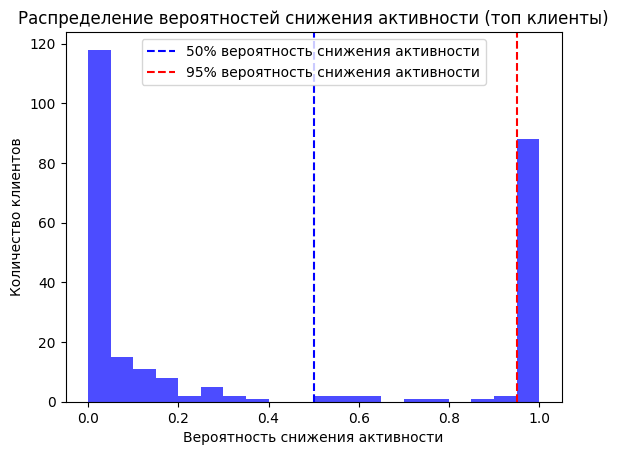

34.0% топ клиентов имеют риск снижения активности более 95 %
37.0% топ клиентов имеют риск снижения активности более 50 %


In [92]:
plt.hist(df_top_profit['вероятность_снижения'], bins=20, alpha=0.7, color='blue')

# линии для пороговых значений
plt.axvline(0.5, color='blue', linestyle='--', label='50% вероятность снижения активности')
plt.axvline(0.95, color='red', linestyle='--', label='95% вероятность снижения активности')

plt.xlabel('Вероятность снижения активности')
plt.ylabel('Количество клиентов')
plt.title('Распределение вероятностей снижения активности (топ клиенты)')
plt.legend()
plt.show()
print(f"{round((df_top_profit['вероятность_снижения'] > 0.95).sum()/len(df_top_profit), 2)*100}" \
"% топ клиентов имеют риск снижения активности более 95 %")
print(f"{round((df_top_profit['вероятность_снижения'] > 0.5).sum()/len(df_top_profit), 2)*100}" \
"% топ клиентов имеют риск снижения активности более 50 %")

На гистограмме рампределения вероятностей снижения активности хорошо видно, что значительная часть топ-клиентов имеет высокий риск (>0.95) снижения активности.  

In [93]:
df_top_profit.set_index('id', inplace=True)

In [94]:
df_top_profit = df_top_profit.merge(
    X_full,
    left_index=True,
    right_index=True,
    how = 'left'
).dropna()

cols = ['вероятность_снижения'] + [col for col in df_top_profit.columns if col != 'вероятность_снижения']
df_top_profit = df_top_profit[cols]

df_top_profit.sample(5)

,вероятность_снижения,прибыль,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минут_предыдущий_месяц,минут_текущий_месяц,выручка_разница_прошл,выручка_разница_тек
id,,,,,,,,,,,,,,,,,
216620,0.091713,5.25,стандарт,да,6.1,4.0,1001.0,0.17,товары_для_детей,3.0,5.0,6.0,19.0,17.0,20.0,90.0,52.0
215734,1.000000,4.87,премиум,да,3.8,4.0,1051.0,0.22,косметика_и_аксесуары,2.0,4.0,3.0,7.0,5.0,11.0,534.0,158.6
215820,1.000000,6.09,стандарт,да,4.0,4.0,955.0,0.95,товары_для_детей,4.0,4.0,7.0,11.0,18.0,14.0,-970.5,-711.1
216345,0.000000,5.39,премиум,да,4.4,4.0,1006.0,0.30,мелкая_бытовая_техника_и_электроника,4.0,3.0,7.0,10.0,21.0,14.0,-760.5,-529.1
216460,0.000000,5.29,стандарт,да,4.4,5.0,237.0,0.95,техника_для_красоты_и_здоровья,4.0,3.0,4.0,4.0,15.0,22.0,-243.0,340.6


In [95]:
df_top_profit['тип_сервиса'].value_counts()

стандарт    182
премиум      78
Name: тип_сервиса, dtype: int64

In [96]:
df_top_premium = df_top_profit[df_top_profit['тип_сервиса'] == 'премиум']
df_top_std = df_top_profit[df_top_profit['тип_сервиса'] == 'стандарт']

Построим гистограммы для премиум и стандартного типов сервиса

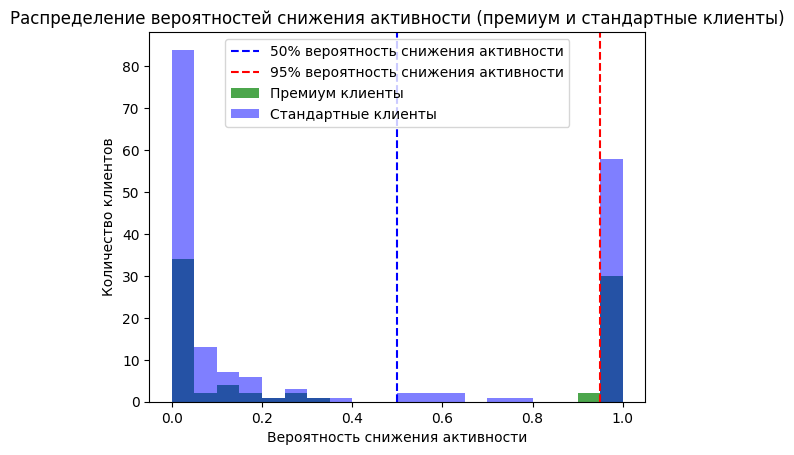

38.46% премиум топ-клиентов имеют риск снижения активности более 95%
31.87% стандартных топ-клиентов имеют риск снижения активности более 95%
41.03% премиум топ-клиентов имеют риск снижения активности более 50%
35.71% топ-стандартных клиентов имеют риск снижения активности более 50%


In [97]:
plt.hist(df_top_premium['вероятность_снижения'], bins=20, alpha=0.7, color='green', label='Премиум клиенты')
plt.hist(df_top_std['вероятность_снижения'], bins=20, alpha=0.5, color='blue', label='Стандартные клиенты')

# линии для пороговых значений
plt.axvline(0.5, color='blue', linestyle='--', label='50% вероятность снижения активности')
plt.axvline(0.95, color='red', linestyle='--', label='95% вероятность снижения активности')

plt.xlabel('Вероятность снижения активности')
plt.ylabel('Количество клиентов')
plt.title('Распределение вероятностей снижения активности (премиум и стандартные клиенты)')
plt.legend()
plt.show()

print(f"{round((df_top_premium['вероятность_снижения'] > 0.95).sum() / len(df_top_premium) * 100, 2)}" \
      "% премиум топ-клиентов имеют риск снижения активности более 95%")
print(f"{round((df_top_std['вероятность_снижения'] > 0.95).sum() / len(df_top_std) * 100, 2)}" \
      "% стандартных топ-клиентов имеют риск снижения активности более 95%")

print(f"{round((df_top_premium['вероятность_снижения'] > 0.5).sum() / len(df_top_premium) * 100, 2)}" \
      "% премиум топ-клиентов имеют риск снижения активности более 50%")
print(f"{round((df_top_std['вероятность_снижения'] > 0.5).sum() / len(df_top_std) * 100, 2)}" \
      "% топ-стандартных клиентов имеют риск снижения активности более 50%")


Отмечается, что именно клиенты с подпиской премиум преобладают в зоне с высоким риском снижения активности.

### Анализ взаимосвязи вероятности снижения активности с остальными признаками

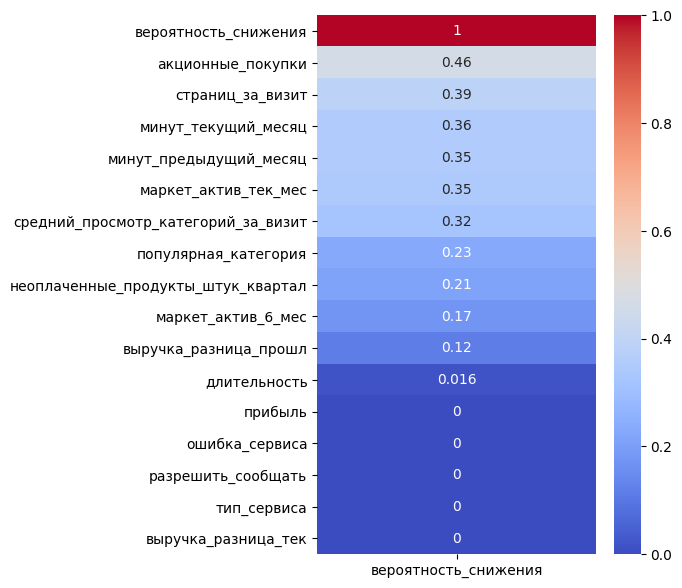

In [98]:
num_cols_top_profit = df_top_profit.select_dtypes(include=['number']).columns

plt.figure(figsize=(4.5,7))
sns.heatmap(
    df_top_profit.phik_matrix(
        interval_cols=num_cols_top_profit
    ).iloc[0].sort_values(ascending=False).to_frame(), 
    annot=True, 
    cmap='coolwarm'
);

Самая сильна связь (phik) вероятности снижения активности со следующими признаками:
- доля акционных покупок (0.46)
- количество страниц за визит (0.39)
- минут за текущий месяц (0.36)
- минут за предыдущий месяц (0.35)
- маркетинговые свзи за текущий месяц (0.35)
- средний просмотр категорий за визит (0.32)

На графиках зависимости по всем признакам явно наблюдается повышенная концентрация точек (клиентов) выше границы риска снижения активности 95%.  

### Анализ прибыльности сегмента

Изучим вклад клиентов сегмента в доход компании.  
Для этого рассчитаем:  
- Среднюю прибыль на клиента
- Суммарную прибыль сегмента и её долю от общей прибыли

In [99]:
df_money.set_index('id', inplace=True)

In [100]:
df_full_profit = df_full.merge(
    df_money,
    left_index=True,
    right_index=True,
    how = 'left'
)

In [101]:
mean_profit = df_top_profit['прибыль'].mean()
mean_not_top_profit = df_full_profit[df_full_profit['прибыль'] < top_profit]['прибыль'].mean()

total_top_profit = df_top_profit['прибыль'].sum()
total_top_profit_risk = df_top_profit[df_top_profit['вероятность_снижения'] > 0.5]['прибыль'].sum()
total_not_top_profit = df_full_profit[df_full_profit['прибыль'] < top_profit]['прибыль'].sum()
total_profit = df_full_profit['прибыль'].sum()
profit_share = total_top_profit / total_profit
profit_risk_share = total_top_profit_risk / total_profit
profit_share_not_top = total_not_top_profit / total_profit


print(f"Средняя прибыль на клиента в сегменте: {mean_profit:.2f}. (Средняя по остальным клиентам: {mean_not_top_profit:.2f})")
print(f"Суммарная прибыль сегмента: {total_profit:.2f}, Доля в общей прибыли: {profit_share:.2%}")
print(f"Доля прибыли клиентов с высоким (>50%) риском снижения в общей прибыли: {profit_risk_share:.2%}")


Средняя прибыль на клиента в сегменте: 5.37. (Средняя по остальным клиентам: 3.65)
Суммарная прибыль сегмента: 5181.02, Доля в общей прибыли: 26.96%
Доля прибыли клиентов с высоким (>50%) риском снижения в общей прибыли: 10.04%


Средняя прибыль на клиента в сегменте: 5.37. (Средняя по остальным клиентам: 3.65).   
Суммарная прибыль сегмента: 5181.02, Доля в общей прибыли: 26.96%.  
Доля прибыли клиентов с высоким (>50%) риском снижения в общей прибыли: 10.04%.  

### Сравним сегмент с другими группами

In [102]:
df_full_profit['категория_прибыль'] = df_full_profit.apply(
    lambda row: 'top' if row['прибыль'] >= top_profit else 'std', 
    axis=1
)

In [103]:
comparison_df = df_full_profit.groupby('категория_прибыль').mean()
comparison_df

,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минут_предыдущий_месяц,минут_текущий_месяц,выручка_разница_прошл,выручка_разница_тек,прибыль
категория_прибыль,,,,,,,,,,,,,
std,4.252947,4.023188,600.263768,0.323111,3.278261,2.859903,4.169082,8.227053,13.456039,13.119807,125.048309,301.445604,3.650097
top,4.270115,3.954023,613.689655,0.308008,3.226054,2.770115,4.245211,8.030651,13.528736,13.570881,56.614943,247.727203,5.376130


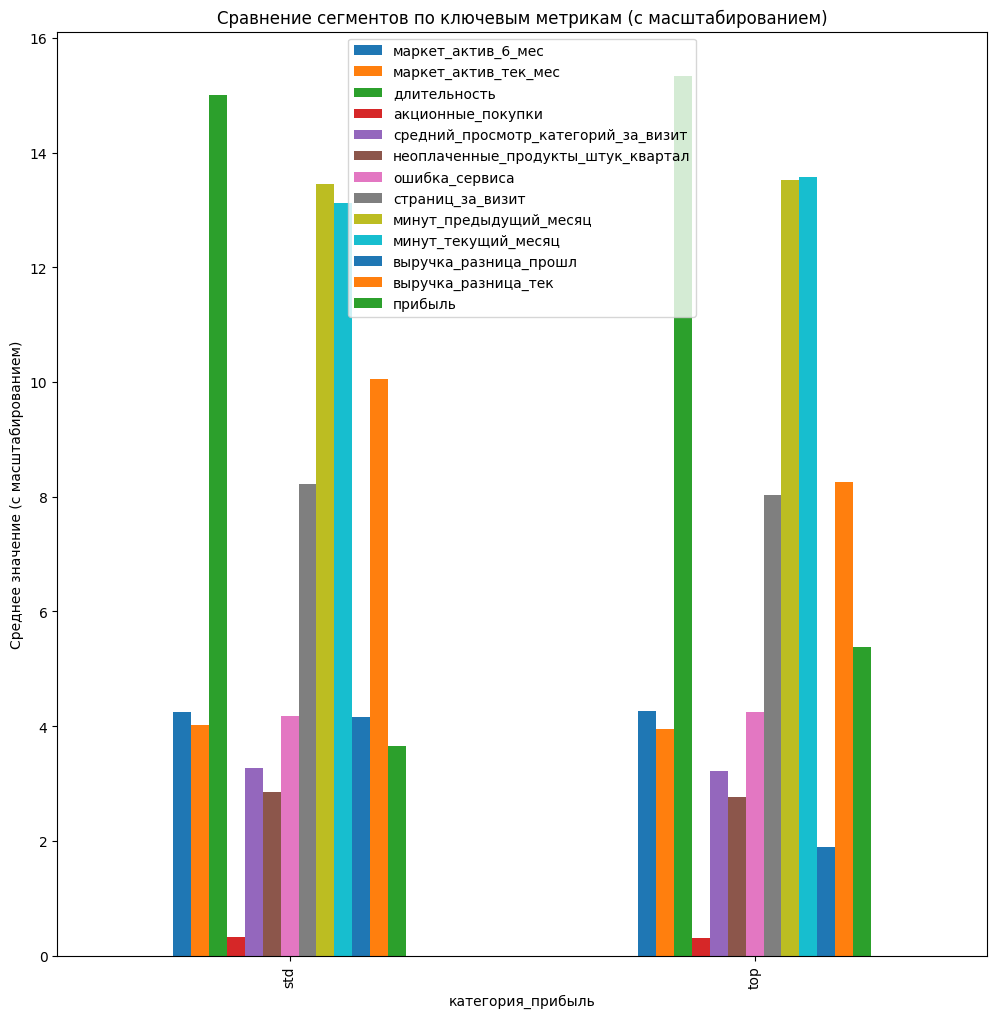

In [104]:
# Применим масштабирование признаков для графика
comparison_df_scaled = comparison_df.copy()
comparison_df_scaled['длительность'] = comparison_df['длительность']/40
comparison_df_scaled['выручка_разница_прошл'] = comparison_df['выручка_разница_прошл']/30
comparison_df_scaled['выручка_разница_тек'] = comparison_df['выручка_разница_тек']/30

# Построим график
comparison_df_scaled.plot(kind='bar', figsize=(12, 12))
plt.title('Сравнение сегментов по ключевым метрикам (с масштабированием)')
plt.ylabel('Среднее значение (с масштабированием)')
plt.show()

**Выводы и рекомендации:**  

В целом, маркетинговая активность и покупательское поведение топ-клиентов незначительно отличается от остальных. Однако есть ряд предложений.  

- Длительная маркетинговая активность более значима для прибыльных клиентов, чем активность в текущем месяце. Следует сделать акцент на поддержании вовлеченности этих клиентов в течение длительного времени.  
- Прибыльные клиенты проводят больше времени на сайте, но просматривают меньше категорий и страниц. Это указывает на необходимость оптимизации навигации и персонализации рекомендаций.  
- У группы top меньшая разница в выручке между периодами, что говорит о стабильности покупательской активности. Рекомендуется внедрить программы лояльности, чтобы сохранить эту стабильность.
- Более высокий уровень ошибок у прибыльных клиентов требует улучшения обслуживания, чтобы предотвратить снижение вовлеченности.
- Прибыльные клиенты менее склонны к акционным предложениям, что открывает возможность увеличения маржи на таких сегментах. Кроме того, средняя выручка топ-клиентов стабильно ниже, чем у менее прибыльных. Это также указывает на то, что клиенты в "топовом" сегменте могут генерировать прибыль за счёт высокомаржинальных товаров.

### Выводы по шагу 8.

Анализ сегмента клиентов с топ-20% по прибыльности и высокой вероятностью снижения покупательской активности (>50%) выявил их ключевую важность для бизнеса. Потеря активности этого сегмента может существенно повлиять на финансовые показатели компании, поскольку они приносят значительную долю выручки.

1. Основные характеристики сегмента  

   Объем сегмента:  
- Всего в выборке — 262 клиента с топ-20% прибыли.
- Из них 99 клиентов (37%) имеют высокий риск снижения активности (вероятность ≥50%).
- 34% топ-клиентов имеют вероятность снижения активности более 95%, что требует немедленных действий.  

   Средняя прибыльность:  
- Средняя прибыль на клиента в сегменте — 5.37, что значительно выше, чем у остальных клиентов (3.65).
- Суммарная прибыль сегмента составляет 5181.02 единицы, или 26.96% от общей прибыли.
- Доля прибыли клиентов с высоким риском (≥50%) снижения активности — 10.04% от общей прибыли.  

2. Особенности покупательского поведения  
   - Длительная маркетинговая активность более значима для прибыльных клиентов, чем активность в текущем месяце. Следует сделать акцент на поддержании вовлеченности этих клиентов в течение длительного времени.  
   - Прибыльные клиенты проводят больше времени на сайте, но просматривают меньше категорий и страниц. Это указывает на необходимость оптимизации навигации и персонализации рекомендаций.  
   - Прибыльные клиенты менее склонны к акционным предложениям, что открывает возможность увеличения маржи на таких сегментах.  
   
   Риск снижения активности и тип сервиса:
- Клиенты с подпиской премиум преобладают среди тех, кто имеет высокий риск снижения активности:
- Это указывает на необходимость особого внимания к премиум-клиентам.  

   Стабильность выручки:  
- Средняя выручка топ-клиентов стабильно ниже, чем у менее прибыльных клиентов.
- Это может свидетельствовать о том, что их прибыльность обеспечивается высокомаржинальными товарами, а не частотой покупок.
- Клиенты в топовом сегменте демонстрируют меньшую разницу в выручке между периодами, что подтверждает стабильность их покупательской активности. Рекомендуется внедрить программы лояльности, чтобы сохранить эту стабильность.  

3. Взаимосвязи и значимые признаки  

   Анализ корреляций (метрика phik) показал, что вероятность снижения активности наиболее сильно связана со следующими факторами:  
- доля акционных покупок (0.46) — клиенты, зависящие от акций, менее устойчивы.
- количество страниц за визит (0.39) — чем меньше страниц просматривает клиент, тем выше риск.
- минут за текущий месяц (0.36) — снижение активности проявляется в уменьшении вовлечённости.
- минут за предыдущий месяц (0.35) — снижение активности проявляется в уменьшении вовлечённости.
- маркетинговые свзи за текущий месяц (0.35) — снижение контактов ухудшает удержание.
- средний просмотр категорий за визит (0.32) — снижение активности проявляется в уменьшении вовлечённости.  

4. Общие тенденции  

- Маркетинговая активность и покупательское поведение топ-клиентов в целом схожи с остальными клиентами, но премиум-клиенты показывают более высокий риск снижения активности.
- Высокоприбыльные клиенты остаются важными за счёт стабильной активности и покупки высокомаржинальных товаров, однако требуют дополнительных мер для удержания.  


**Рекомендации**

1) Сфокусироваться на премиум-клиентах:  
   - Разработать стратегию удержания, включающую эксклюзивные предложения, персонализированные рекомендации и премиальные привилегии.
   - Увеличить маркетинговую активность, направленную на этот сегмент, особенно в части индивидуальных коммуникаций.  

2) Повысить вовлечённость клиентов с высоким риском:  
   - Увеличить время, проводимое клиентами на сайте, за счёт улучшения интерфейса, персонализированных рекомендаций и удобных фильтров.
   - Стимулировать просмотр большего количества категорий товаров через таргетированные рекламные кампании.  

3) Улучшить качество сервиса и процессов оплаты:  
   - Минимизировать количество неоплаченных продуктов, упрощая процесс оформления заказов.
   - Проконтролировать и снизить ошибки сервиса.  
   
4) Использовать акционные предложения с осторожностью:  
   - Предлагать акции, но избегать зависимости премиум-клиентов от скидок.
   - Важно сохранить восприятие премиального качества.


## Шаг 9. Общий вывод.


# Описание данных  

Данные для работы находятся в нескольких таблицах.
- market_file.csv
  Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
  + id — номер покупателя в корпоративной базе данных.
  + Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
  + Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
  + Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
  + Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
  + Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
  + Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
  + Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
  + Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
  + Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
  + Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
  + Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
  + Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.
- market_money.csv
  Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
  + id — номер покупателя в корпоративной базе данных.
  + Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
  + Выручка — сумма выручки за период.
- market_time.csv
  Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
  + id — номер покупателя в корпоративной базе данных.
  + Период — название периода, во время которого зафиксировано общее время.
  + минут — значение времени, проведённого на сайте, в минутах.
- money.csv
  Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
  + id — номер покупателя в корпоративной базе данных.
  + Прибыль — значение прибыли.
  
# Загрузка и предобработка данных

Загрузили данные и создали 4 датафрейма
- df_market_file
- df_market_money
- df_market_time
- df_money  
     
- Данные в таблицах соответствуют описанию
- Пропуски в данных отсутствуют 
- Дубликаты отсутствуют
- Необходимость корректировки типов данных отсутствует  

* Откорректировали названия столбцов и строковых значений
* Исправили некоторые значения

# Исследовательский анализ данных

**По результатам проведенного анализа установлено следующее:  

- **Количественные признаки:**
  - `маркет_актив_6_мес` - среднемесячное значение маркетинговых коммуникаций за последние 6 месяцев.   
    Распределение от 0.9 до 6.6. Среднее 4.25.  
    Распределение отклоняется от нормального.  
    Отмечается некоторое количество (36 шт.) выбросов - клиенты, с которыми связывались в среднем менее 2 раз в месяц.  
  - `Маркет_актив_тек_мес` - количество маркетинговых коммуникаций в текущем месяце.  
    Принимает дискретные целочисленные значения:  3, 4 и 5.  
    Причем, примерно половина значений "4" - преобладающий класс. Что примерно соответствует среднему показателю маркетинговых коммуникаций за последние 6 месяцев.  
    Вместе с тем, клинеты с 1 - 2 контактами за текущий месяц отсутствуют.
  - `длительность` - дней прошло с момента регистрации покупателя на сайте.  
    Рачпределение от 110 до 1079. Среднее 602.
    Распределение отклоняется от нормального.
    При этом, для данного параметра эта тенденция говорит о том, что новых пользователей становится всё меньше.  
  - `акционные_покупки` - среднемесячная доля покупок по акции от общего числа покупок.  
    Отмечается две моды - в районе 0.24 и около 0.9.  
    Таким образом, можно выделить группу пользователей 165шт. (акционные_покупки > 0.8), которые почти все (или все) покупки совершают только по акциям.  
    При этом медианное значение (0.24) примерно отражает средний показатель пользователей, которые не стремятся совершать покупки только по акции.  
  - `средний_просмотр_категорий_за_визит` - сколько в среднем категорий покупатель просмотрел за визит.  
    Принимает дискретные целочисленные значения от 1 до 6 включительно.  
    При этом апроксимация распределения стремится к нормальному со средним 3. 
  - `неоплаченные_продукты_штук_квартал` - общее число неоплаченных товаров в корзине за последние 3 месяца.  
    Принимает дискретные целочисленные значения от 0 до 10 включительно.  
    При этом апроксимация распределения стремится к нормальному со средним 3, скошено слева.  
    Отмечается некоторое количество (34 шт.) выбросов (значения более 8).  
  - `ошибка_сервиса` - число сбоев, которые коснулись покупателя во время посещения сайта.  
    Принимает дискретные целочисленные значения от 0 до 9 включительно.  
    При этом апроксимация распределения стремится к нормальному со средним 4.  
  - `страниц_за_визит` - среднее количество страниц, которые просмотрел покупатель за один визит на сайт.  
    Принимает дискретные целочисленные значения от 1 до 20 включительно.  
    При этом апроксимация распределения стремится к нормальному со средним 8.  
  - `выручка` - сумма выручки за период.  
     Распределение близко к нормальному.  
     От 2758.7 до 7799.4. Среднее 5007.3. Стандартное отклонение 679.7.  
     Отмечается одно аномальное значение выброс (выручка 106862 руб.), существенно отличается от остальных (на порядок). А также всего 6 строк с выручкой = 0. 
     Вместе с тем, даже без учета экстремальных значений (0 и 106 тыс.) на box-plot отчетливо видны выбросы - значения, которые выходят за  границы усов boxplot (более чем на полтора межквартильных размаха) как слева, так и справа.
  - `минут` - значение времени, проведённого на сайте, в минутах.  
     Принимает целочисленные значения.  
     От 4 до 23. Среднее 13. Стандартное отклонение 4.  
     Апроксимация распределения близко к нормальному.  
  - `прибыль` - значение прибыли.  
    Распределение максимально приближено к нормальному.  
    От 0.86 до 7.43. Среднее 4.  Стандартное отклонение 1.01.
    Вместе с тем, на box-plot отчетливо видно некоторое количество выбросов - значений, которые выходят за  границы усов boxplot (более чем на полтора межквартильных размаха) как слева, так и справа.  
  
- **Категориальные признаки:**
  - `покупательская_активность` `df_market_file` - рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень». Биноминальный признак.   
    Отмечается, что покупательская активность снизилась у 38.3 % пользователей.  
  - `тип_сервиса` `df_market_file`- уровень сервиса: «премиум» или «стандарт». Биноминальный признак.  
    28.9 % пользователей пользуются премиум сервисом.  
  - `разрешить_сообщать` `df_market_file` - информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Биноминальный признак.  
    74 % пользователей дали согласие на рассылку.  
  - `популярная_категория` `df_market_file` - самая популярная категория товаров у покупателя за последние 6 месяцев.  
    Признак содержит 6 классов. Распределение долей от 10.6 % (кухонная посуда) до 25.4 % (товары для детей).  
  - `период` `df_market_money` - название периода, во время которого зафиксирована выручка.   
    Значения распределены равномерно между тремя периодами. То есть по всем пользователям имеется информация за каждый из трех периодов (текущий, предыдущий, предпредыдущий месяцы).  
  - `период` `df_market_time` - название периода, во время которого зафиксировано общее время.  
    Значения распределены равномерно между двумя периодами. То есть по всем пользователям имеется информация за каждый из двух периодов (текущий, предыдущий месяцы).
  
**Отбрали клиентов с покупательской активностью не менее трёх месяцев.**
- Почти все (1297) пользователи из представленных данных - активные.  
    Отмечается, что только по 3 пользователям есть нулевые значения выручки.

# Корреляционный анализ  

Объединили в df_full таблицы market_file.csv, market_money.csv, market_time.csv. Создали отдельный столбец для каждого периода.

**Преобразовали признаки** 
- Признаки выручки:  
  Вместо трёх признаков (выручка_предпредыдущий_месяц, выручка_предыдущий_месяц, выручка_текущий_месяц) создали два:
    + `выручка_разница_тек`
    + `выручка_разница_прошл`
- Маркетинговая активность:  
  Создали признак маркет_актив_тек_6_мес, учитывающий данные текущего месяца:
    + `маркет_актив_тек_6_мес`

**Матрица Phik:**  
- Сильную связь покупательская активность имеет с  
  - количеством страниц за визит (0.75)  
  - количеством минут в предыдущем (0.69) и текущем (0.58) месяцах  
  
- Средняя связь таргета отмечается со следующими признаками:
  - маркет_актив_6_мес (0.54)
  - средний_просмотр_категорий_за_визит (0.54)
  - акционные_покупки (0.51)
  - неоплаченные_продукты_штук_квартал (0.51)
  
- Отсутсвие связи таргета со следующими признаками:
  - маркет_актив_тек_мес
  - разрешить_сообщать
  Значение 0 с таргетом означает, что между данными признаками и целевой переменной отсутствует любая линейная или нелинейная зависимость. Поэтому, признаки можно считать бесполезным для модели.
  
- Вероятное наличие мультиколлинеарности:
  - сильная связь выручки за текущий месяц с предыдущим (0.84). После преобразования данных - мультиколлинеарности отсутствует.
  
**VIF**  
- Полученные значения VIF говорят об отсутствии корреляции между признаками.  
  Отмечается умеренная корреляция выручка_предыдущий_месяц и выручка_текущий_месяц. Признаки имеют небольшую зависимость от других признаков. После преобразования данных - корреляция между признаками отсутствует.

# Обучение и оптимизация моделей

На этом этапе был реализован полный процесс предобработки данных, выбора признаков и обучения моделей с оптимизацией гиперпараметров. Основные шаги включают:  

1) Разделение данных на тренировочную и тестовую выборки.  
   Целевой признак — "покупательская активность".  
   Использовалась стратификация, чтобы сохранить пропорции классов в обеих выборках.  
   
2) Кодирование целевой переменной  
   - Класс "1" — снижение покупательской активности, "0" — сохранение прежнего уровня.
     Для кодирования использован LabelEncoder.  
     
3) Создание пайплайнов для обработки признаков.  
   - Категориальные признаки (OHE): Применение OneHotEncoding с предварительным заполнением пропусков.
   - Порядковые признаки (OrdinalEncoder): Кодирование с учетом заданного порядка категорий, включая этапы обработки пропусков до и после кодирования.
   - Числовые признаки: Масштабирование с использованием MinMaxScaler. Полиномиальные признаки второго порядка были исключены из-за ухудшения метрик.  
   
4) Выбор признаков.  
   Использован метод SelectKBest с функциями f_classif и mutual_info_classif для отбора наиболее значимых признаков.

5) Оптимизация гиперпараметров моделей.  
   Для оптимизации применялись OptunaSearchCV и GridSearchCV.  
   Метрики для подбора гиперпараметров:  
   - Основная: Recall (максимизация обнаружения клиентов с пониженной активностью).
   - Дополнительные: ROC-AUC, Precision, fbeta-score (с акцентом на Recall).  

6) Модели, участвующие в оптимизации. 
   - KNeighborsClassifier (KNN): Оптимизация количества соседей, веса и метрики расстояний.
   - DecisionTreeClassifier: Оптимизация глубины дерева, количества признаков и минимального числа объектов в узле.
   - LogisticRegression: Настройка параметров регуляризации, штрафов и максимального числа итераций.
   - SVC: Оптимизация параметров ядра, коэффициента регуляризации и класса весов.  

7) Результаты подбора гиперпараметров.  
   Оптимизировано все 4е модели при помощи OptunaSearchCV и дополнительно 2 модели (svc, knn) при помощи GridSearchCV.  
   Сравнение результатов каждой модели проведено по нескольким метрикам.   
   
8) Кросс-валидация и итоговая оценка.  
   Проведена кросс-валидация с использованием пайплайна для каждой модели.  
   Оценены средние значения метрик (Recall, Precision, fbeta-score, ROC-AUC) на обучающей выборке.   

**Вывод**  
Модель - SVC с параметрами от OptunaSearch при кросс-валидации показывает на тренировочной выборке recall = 1.0. То есть находит 100% клиентов с риском снижения активности. При этом, precision указанной модели сильно снизился (до 0.38), то есть дает очень много ложноположительных ответов.

Хороший результат recall (0.819488) показала модель knn с параметрами от GridSearchCV при сбалансированном precision (0.878791) и хорошим roc_auc (0.892944).  

Таким образом, лучше остановиться на модели knn GridSearchCV.    

Параметры модели knn:  
'models__n_neighbors': 67,  
'models__weights': 'distance',  
'models__metric': 'euclidean',   
'selector__score_func': <function f_classif at 0x7fa6764023a0>,  
'selector__k': 5

Модель на тестовой выборке показала хороший recall (0.8293) и ROC-AUC (0.8950) при высоком precision (0.8870).

# Анализ важности признаков  

**Выводы по результатам анализа важности признаков**

- Наиболее значимые признаки:

   - **Количество страниц за визит** (страниц_за_визит) — имеет наибольшее среднее абсолютное значение SHAP (0.130). Это указывает на то, что данный признак играет ключевую роль в прогнозировании активности покупателей. Логично предположить, что чем больше страниц просматривает клиент, тем выше вероятность его вовлеченности.
   - **Доля акционных покупок** (акционные_покупки) — значимость 0.130. Этот показатель указывает на интерес клиента к промо-акциям и выгодным предложениям. Вместе с тем, клиенты, совершающие больше акционных покупок, более склонны к снижению активности, что может говорить о временной заинтересованности в акциях.  
   - **Количество минут за предыдущий месяц** (0.12) и **за текущий месяц** (0.11). Он отражает уровень взаимодействия клиента с платформой за недавний и текущий период и также сильно влияет на предсказание.
   - **Маркетинговая активность за 6 месяцев** (маркет_актив_6_мес) — SHAP (0.06). Это указывает на умеренную зависимость между уровнем маркетинговой активности и покупательским поведением. Клиенты, на которых была направлена активная маркетинговая поддержка, менее склонны к снижению активности.
  

- Признаки с низкой значимостью:
   - в результате отбора признаков с помощью SelectKBest остальные признаки не попали в модель ввиду низкой значимости:   
     - 'выручка_разница_тек',    
     - 'тип_сервиса',    
     - 'неоплаченные_продукты_штук_квартал',     
     - 'длительность',     
     - 'средний_просмотр_категорий_за_визит',    
     - 'маркет_актив_тек_мес',    
     - 'выручка_разница_прошл',    
     - 'разрешить_сообщать_нет',     
     - 'ошибка_сервиса',    
     - все признаки раздела 'популярная_категория'.  

   
**Практические выводы:**

   - Основное внимание при разработке стратегии привлечения клиентов следует уделить анализу активности на сайте (количество страниц за визит и времени, проведенного на сайте). Увеличение времени, проведённого клиентами на сайте, и числа просматриваемых страниц является важным фактором, снижающим вероятность снижения активности.
   - Доля акционных покупок — значимый показатель. Регулярные акции и персонализированная коммуникация помогают удерживать клиентов. Однако важно учитывать, что акционные покупки могут быть временным стимулом, а не долговременной стратегией. Поэтому необходимо разработать более долгосрочные стратегии лояльности, например, программы накопления бонусов.  
   - Ранняя идентификация риска - на основании данных о количестве минут и просмотренных страниц можно заранее выявлять снижение интереса клиентов и запускать стратегии удержания, например, персонализированные предложения.  
   - Низкая значимость остальных признаков предполагает, что они имеют ограниченное влияние на покупательскую активность и могут использоваться как дополнительные данные для сегментации, но не для основного анализа.  

**Рекомендации:** 
- Для дальнейшего улучшения модели стоит сосредоточиться на более глубоких данных о поведении клиентов на сайте и изучении временной динамики активности.  
- Для группы клиентов, склонных к снижению активности, эффективными будут таргетированные акции и улучшение UX-процессов (например, оплаты). Это позволит удерживать их интерес и снизить вероятность потери вовлечённости.  

# Анализ сегмента клиентов с топ-20% прибыльности  

Анализ сегмента клиентов с топ-20% по прибыльности и высокой вероятностью снижения покупательской активности (>50%) выявил их ключевую важность для бизнеса. Потеря активности этого сегмента может существенно повлиять на финансовые показатели компании, поскольку они приносят значительную долю выручки.

1. Основные характеристики сегмента  

   Объем сегмента:  
- Всего в выборке — 262 клиента с топ-20% прибыли.
- Из них 99 клиентов (37%) имеют высокий риск снижения активности (вероятность ≥50%).
- 34% топ-клиентов имеют вероятность снижения активности более 95%, что требует немедленных действий.  

   Средняя прибыльность:  
- Средняя прибыль на клиента в сегменте — 5.37, что значительно выше, чем у остальных клиентов (3.65).
- Суммарная прибыль сегмента составляет 5181.02 единицы, или 26.96% от общей прибыли.
- Доля прибыли клиентов с высоким риском (≥50%) снижения активности — 10.04% от общей прибыли.  

2. Особенности покупательского поведения  
   - Длительная маркетинговая активность более значима для прибыльных клиентов, чем активность в текущем месяце. Следует сделать акцент на поддержании вовлеченности этих клиентов в течение длительного времени.  
   - Прибыльные клиенты проводят больше времени на сайте, но просматривают меньше категорий и страниц. Это указывает на необходимость оптимизации навигации и персонализации рекомендаций.  
   - Прибыльные клиенты менее склонны к акционным предложениям, что открывает возможность увеличения маржи на таких сегментах.  
   
   Риск снижения активности и тип сервиса:
- Клиенты с подпиской премиум преобладают среди тех, кто имеет высокий риск снижения активности:
- Это указывает на необходимость особого внимания к премиум-клиентам.  

   Стабильность выручки:  
- Средняя выручка топ-клиентов стабильно ниже, чем у менее прибыльных клиентов.
- Это может свидетельствовать о том, что их прибыльность обеспечивается высокомаржинальными товарами, а не частотой покупок.
- Клиенты в топовом сегменте демонстрируют меньшую разницу в выручке между периодами, что подтверждает стабильность их покупательской активности. Рекомендуется внедрить программы лояльности, чтобы сохранить эту стабильность.  

3. Взаимосвязи и значимые признаки  

   Анализ корреляций (метрика phik) показал, что вероятность снижения активности наиболее сильно связана со следующими факторами:  
- доля акционных покупок (0.46) — клиенты, зависящие от акций, менее устойчивы.
- количество страниц за визит (0.39) — чем меньше страниц просматривает клиент, тем выше риск.
- минут за текущий месяц (0.36) — снижение активности проявляется в уменьшении вовлечённости.
- минут за предыдущий месяц (0.35) — снижение активности проявляется в уменьшении вовлечённости.
- маркетинговые свзи за текущий месяц (0.35) — снижение контактов ухудшает удержание.
- средний просмотр категорий за визит (0.32) — снижение активности проявляется в уменьшении вовлечённости.  

4. Общие тенденции  

- Маркетинговая активность и покупательское поведение топ-клиентов в целом схожи с остальными клиентами, но премиум-клиенты показывают более высокий риск снижения активности.
- Высокоприбыльные клиенты остаются важными за счёт стабильной активности и покупки высокомаржинальных товаров, однако требуют дополнительных мер для удержания.  


# **Рекомендации**

1) Сфокусироваться на премиум-клиентах:  
   - Разработать стратегию удержания, включающую эксклюзивные предложения, персонализированные рекомендации и премиальные привилегии, 
   - Увеличить маркетинговую активность, направленную на этот сегмент, особенно в части индивидуальных коммуникаций.  

2) Повысить вовлечённость клиентов с высоким риском:  
   - Увеличить время, проводимое клиентами на сайте, за счёт улучшения интерфейса, персонализированных рекомендаций и удобных фильтров.
   - Стимулировать просмотр большего количества категорий товаров через таргетированные рекламные кампании.  

3) Улучшить качество сервиса и процессов оплаты:  
   - Минимизировать количество неоплаченных продуктов, упрощая процесс оформления заказов.
   - Проконтролировать и снизить ошибки сервиса.  
   
4) Использовать акционные предложения с осторожностью:  
   - Предлагать акции, но избегать зависимости премиум-клиентов от скидок.
   - Важно сохранить восприятие премиального качества.
